# Исследование продаж компьютерных игр

Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Необходимоо выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение общей информации

In [ ]:
# Импортирую библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [ ]:
# Убираю ограничение на количество отоброжаемых столбцов
pd.set_option('display.max_columns', None)

In [ ]:
# Открываю и сохраняю файл с базой данных
data = pd.read_csv('/datasets/games.csv')

In [ ]:
# Сохраняю старую базу данных, для сравнния в конце
data_old = data

In [ ]:
# Изучаю общий вид таблицы базы данных
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
# Изучаю общую информацию об имеющихся данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# Изучаю распределение числовых значений
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
# Изучаю количество абсолютных и относительных пропусков в таблице
def missing(data):
    count_missing = data.isna().sum()
    percent_missing = round(data.isna().sum() * 100 / len(data), 2)

    missing_value_data = pd.DataFrame({'Количество пропусков': count_missing,
                                       'Процент пропусков': percent_missing})

    return missing_value_data
missing(data)

,Количество пропусков,Процент пропусков
Name,2,0.01
Platform,0,0.00
Year_of_Release,269,1.61
Genre,2,0.01
NA_sales,0,0.00
EU_sales,0,0.00
JP_sales,0,0.00
Other_sales,0,0.00
Critic_Score,8578,51.32
User_Score,6701,40.09


In [ ]:
# Изучаю датафрейм на предмет явных дубликатов
data.duplicated().sum()

0

**Вывод по пункту 1:**

В нашем распоряжении база данных с информацией о продаже игр на различных платформах с 1980 по 2016 года, по разным регионам.

На первом этапе изучения данных видно, что основной массой пропущенных данных являются столбцы Critic_Score, User_Score и Rating. Пропуски необходимо проанализировать и, по позможности, заполнить

Явные дубликаты отсутствуют

Названия столбцов необходимо привести к нижнему регистру

Формат значений столбца Year_of_Release необходимо изменить (на данный момент float64), считаю целесообразным использовать формат int, т.к. нас интересует исключительно год, без учета месяца и дня.

Формат значений столбца User_Score необходимо изменить (на данный момент object), считаю целесообразным использовать формат float64, т.к. оценки выставляются по 10 бальной шкале, но и использованием десятичных дробей

## Предобработка данных

In [ ]:
# Привожу названия колонок датафрейма к нижнему регистру
data.columns = data.columns.str.lower()
# Проверяю
data.head(0)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [ ]:
# Создаю функцию для быстрого просмотра данных столбца
def analysis(column):
    print('Тип данных', data[column].dtypes)
    print('Количество пропусков',data[column].isna().sum())
    if data[column].dtypes != 'object':
        print('Минимальное значение:',data[column].min(), 'Максимальное значение:', data[column].max() )
    print('Уникальные значения:', '\n', data[column].value_counts())

### Столбец 'name'

In [ ]:
# Изучаю столбец name
analysis('name')

Тип данных object
Количество пропусков 2
Уникальные значения: 
 Need for Speed: Most Wanted    12
Madden NFL 07                   9
Ratatouille                     9
FIFA 14                         9
LEGO Marvel Super Heroes        9
                               ..
Lucky Luke                      1
Azure Striker Gunvolt           1
Spy Fox in Dry Cereal           1
Disney Art Academy              1
Republique                      1
Name: name, Length: 11559, dtype: int64


In [ ]:
# На примере самого часто повторяемого значения рассмотрю природу повторов
display(data.loc[data['name'] == 'Need for Speed: Most Wanted'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Данная игра представлена в датафрейме 12 раз в следствии выпуска на разных игровых устройствах.

Наличие 2-ух значений в столбце year_of_release в данном случае не является ошибкой, т.к. данные проект издавался в 2012 году в качестве ремейка под старым названием

In [ ]:
# На другом примере рассмотрю природу повторов
display(data.loc[data['name'] == 'FIFA 14'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
126,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E
271,FIFA 14,X360,2013.0,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E
469,FIFA 14,PS4,2013.0,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E
1753,FIFA 14,XOne,2013.0,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E
4699,FIFA 14,PSV,2013.0,Sports,0.08,0.23,0.01,0.09,NaN,1.8,E
4809,FIFA 14,PC,2013.0,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E
4985,FIFA 14,Wii,2013.0,Sports,0.00,0.36,0.00,0.02,NaN,4.3,E
6871,FIFA 14,3DS,2013.0,Sports,0.00,0.22,0.00,0.01,NaN,NaN,NaN
7875,FIFA 14,PSP,2013.0,Sports,0.00,0.15,0.00,0.04,NaN,3.4,E


Вопросов к повторяющемся значениям в столбце name на данный момент нет

In [ ]:
# Рассмотрю пропущенные значения
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данные строки не несут в себе важных для дальнейшего исследования данных (столбцы name и genre). Удаляю эти строки

In [ ]:
# Удаляю строки 659 и 14244
data.drop(index=[659, 14244], inplace=True)
# Проверяю
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Вывод по пункту 2.1:**

Были удалены значения с пропусками, которые не представлялось возможным восстановить.

Были изучены повторяющиеся значения на примере 2-ух проектов. Повторы наименований к колонке 'name' не являются ошибкой и являются следствием выпуска одной игры на разных платформах и перезапуск проекта в виде ремейка

### Столбец 'platform'

In [ ]:
# Изучаю столбец platform
analysis('platform')

Тип данных object
Количество пропусков 0
Уникальные значения: 
 PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64


**Вывод по пункту 2.2:**

Пропусков и явных проблем на данном этапе исследования не замечено.

### Столбец 'year_of_release'

In [ ]:
# Изучаю столбец year_of_release
analysis('year_of_release')

Тип данных float64
Количество пропусков 269
Минимальное значение: 1980.0 Максимальное значение: 2016.0
Уникальные значения: 
 2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64


In [ ]:
# Изучаю пропуски в столбце year_of_release с учетом количества продаж в регионе "Северная Америка"
display(data.loc[data['year_of_release'].isna() & (data['na_sales'] >= 0.5)])
# Количество пропусков в столбце year_of_release, но со значимым количеством продаж в ключевом регионе
data['name'].loc[data['year_of_release'].isna() & (data['na_sales'] >= 0.5)].count()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


30

Вручную обработать все пропуски не считаю целесообразным. Но обработать проекты с количеством проданных копий более 500 тыс. в регионе Северная Америка считаю полезным.

Выбрал именно этот регион, т.к. в основном касса на медийные продукты собирается именно в Северной Америке (даже преимущественно в США). По состоянию на сегодняшний день Азия (во главе с Китаем) так же сильно влияет на доходность медийных продуктов, но по состоянию на 2016 год это влияние было меньше.

Для определени даты выпуска проекта использовал поисковую систему Яндекс, со ссылками на Википедию.

In [ ]:
# Список с индексами строк которым необходимо присвоить даты выхода проектов
index_year_of_release = [183, 377, 456, 475, 609, 627,
                        657, 678, 719, 805, 1131, 1142,
                        1301, 1506, 1538, 1585, 1609, 1650,
                        1699, 1840, 1984, 2010, 2106, 2132,
                        2281, 2453, 2479, 2849, 3413, 3486]

# Даты выхода проектов, полученные с открытых источников
year_of_release_list = [2003, 2003, 2008, 2005, 1978, 2007,
                       2001, 2008, 2006, 2007, 2010, 2010,
                       1998, 1979, 2008, 1977, 2011, 2002,
                       2002, 2007, 1999, 1997, 1977, 2011,
                       1995, 2011, 2006, 2010, 2005, 2001]

# Цикл присваивающий конкретной строке ранее найденную дату выхода
for index in range(12):
    data.loc[index_year_of_release, 'year_of_release'] = year_of_release_list

# Проверяю
display(data.loc[index_year_of_release])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2003.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,2008.0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,1978.0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,2007.0,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,2001.0,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,2008.0,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,2006.0,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,2007.0,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [ ]:
# Удаляю остальные данные с пропусками
data.dropna(subset=['year_of_release'], inplace = True)
# Проверяю
data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [ ]:
# Перевожу данные в формат int
data['year_of_release'] = data['year_of_release'].astype('int')
# Проверяю
data['year_of_release'].dtypes

dtype('int64')

**Вывод по пункту 2.3:**

Часть данных столбца year_of_release удалось восстановить в ручном режиме, через поиск информации в интернете. Данный метод был применен к позициям, которые, как я посчитал, стоит восстановить, а именно с количеством продаж в ключевом регионе от 500 тыс. копий.

Остальные данные с пропусками были удалены, т.к. год выпуска является важной информацией в дальнейшем исследовании.

Формат данных столбца year_of_release был изменен на int

### Столбец 'genre'

In [ ]:
# Изучаю столбец genre
analysis('genre')

Тип данных object
Количество пропусков 0
Уникальные значения: 
 Action          3316
Sports          2313
Misc            1726
Role-Playing    1481
Shooter         1300
Adventure       1295
Racing          1227
Platform         879
Simulation       857
Fighting         838
Strategy         673
Puzzle           569
Name: genre, dtype: int64


**Вывод по пункту 2.4:**

Пропусков и явных проблем на данном этапе исследования не замечено.

### Столбец 'na_sales'

In [ ]:
# Изучаю столбец na_sales
analysis('na_sales')

Тип данных float64
Количество пропусков 0
Минимальное значение: 0.0 Максимальное значение: 41.36
Уникальные значения: 
 0.00    4449
0.02     562
0.03     554
0.04     543
0.05     536
        ... 
4.12       1
8.41       1
1.97       1
3.70       1
3.43       1
Name: na_sales, Length: 402, dtype: int64


**Вывод по пункту 2.5:**

Пропусков и явных проблем на данном этапе исследования не замечено.

### Столбец 'eu_sales'

In [ ]:
# Изучаю столбец eu_sales
analysis('eu_sales')

Тип данных float64
Количество пропусков 0
Минимальное значение: 0.0 Максимальное значение: 28.96
Уникальные значения: 
 0.00    5768
0.01    1467
0.02    1291
0.03     912
0.04     702
        ... 
9.14       1
1.92       1
3.86       1
2.59       1
3.87       1
Name: eu_sales, Length: 307, dtype: int64


**Вывод по пункту 2.6:**

Пропусков и явных проблем на данном этапе исследования не замечено.

### Столбец 'jp_sales'

In [ ]:
# Изучаю столбец jp_sales
analysis('jp_sales')

Тип данных float64
Количество пропусков 0
Минимальное значение: 0.0 Максимальное значение: 10.22
Уникальные значения: 
 0.00    10327
0.02      733
0.01      699
0.03      540
0.04      392
        ...  
3.84        1
1.17        1
3.03        1
2.66        1
1.71        1
Name: jp_sales, Length: 244, dtype: int64


**Вывод по пункту 2.7:**

Пропусков и явных проблем на данном этапе исследования не замечено.

### Столбец 'other_sales'

In [ ]:
# Изучаю столбец other_sales
analysis('other_sales')

Тип данных float64
Количество пропусков 0
Минимальное значение: 0.0 Максимальное значение: 10.57
Уникальные значения: 
 0.00    6492
0.01    3401
0.02    1596
0.03     913
0.04     645
        ... 
0.72       1
2.11       1
0.96       1
1.48       1
3.96       1
Name: other_sales, Length: 155, dtype: int64


**Вывод по пункту 2.8:**

Пропусков и явных проблем на данном этапе исследования не замечено.

### Столбец 'critic_score'

In [ ]:
# Изучаю столбец critic_score
analysis('critic_score')

Тип данных float64
Количество пропусков 8468
Минимальное значение: 13.0 Максимальное значение: 98.0
Уникальные значения: 
 70.0    252
71.0    248
75.0    241
80.0    236
73.0    236
       ... 
29.0      3
20.0      3
13.0      1
17.0      1
21.0      1
Name: critic_score, Length: 81, dtype: int64


**Вывод по пункту 2.9:**

Заполнить пропуски не представляется возможным, т.к. нет зависимости рейтинга от других данных, которые нам известны об игре.
Удалять пропуски так же не считаю возможным, т.к. они составляют больше половины данных столбца critic_score (51,42 %)

### Столбец 'user_score'

In [ ]:
# Изучаю столбец user_score
analysis('user_score')

Тип данных object
Количество пропусков 6612
Уникальные значения: 
 tbd    2378
7.8     323
8       286
8.2     277
8.3     252
       ... 
0.7       2
9.6       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64


Значение tbd расшифровывается как "To Be Determined" или "Будет определено". В данном случае считаю целесообразным расценивать это значение как отсутствие значения, а значит ставим пропуск, вместо tbd

In [ ]:
# Убираем значени tbd
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
# Проверяем
analysis('user_score')

Тип данных object
Количество пропусков 8990
Уникальные значения: 
 7.8    323
8      286
8.2    277
8.3    252
7.5    249
      ... 
0.7      2
9.6      2
0.9      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64


Формат значений столбца user_score меняем на формат float64, т.к. оценки выставляются по 10 бальной шкале, но и использованием десятичных дробей

In [ ]:
# Перевожу данные в формат float
data['user_score'] = data['user_score'].astype('float')
# Проверяю
data['user_score'].dtypes

dtype('float64')

**Вывод по пункту 2.10:**

Значение tbd было заменено на пропуски, т.к. фактически является аналогом пропуска.

Заполнить пропуски не представляется возможным, т.к. нет зависимости рейтинга от других данных, которые нам известны об игре.

Удалять пропуски так же не считаю возможным, т.к. они составляют больше половины данных столбца user_score

Формат данных столбца user_score был изменен с object на float64

### Столбец 'rating'

In [ ]:
# Изучаю столбец rating
analysis('rating')

Тип данных object
Количество пропусков 6683
Уникальные значения: 
 E       3930
T       2911
M       1539
E10+    1398
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64


Присваиваем пропускам значение нет рейтинга "no rating"

In [ ]:
# Присваиваем значение no rating
data['rating'] = data['rating'].fillna('no rating')
# Проверяем
analysis('rating')

Тип данных object
Количество пропусков 0
Уникальные значения: 
 no rating    6683
E            3930
T            2911
M            1539
E10+         1398
EC              8
K-A             3
AO              1
RP              1
Name: rating, dtype: int64


**Вывод по пункту 2.11:**

Заменил пропуски в столбце rating на значения 'no rating'

### Суммарные продажи во всех регионах

In [ ]:
# Создаю столбец total_sales и подсчитываю общие продажи
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [ ]:
# Проверяю
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38


**Вывод по пункту 2.12:**

Создал новый столбец total_sales, в котором отражена сумма продаж со всех регионов, представленных в датафрейме

**Вывод по разделу 2:**

В процессе предобработки данных были выполенны следующие действия:

- наименования стоблцов приведены к нижнему регистру
- удалены строки с пропусками данных в столбцах name
- Восстановлены данные в столбце year_of_release для 30 пропусков из 269, оставшиеся 239 были удалены
- значения user_score, равные 'tbd' (To Be Determined) изменено на пропуски значений (значение nan)
- пропуски значений столбца rating заменены на значение 'no rating'
- подсчитаны и сохранены в столбце total_sales суммарные продажи во всех регионах.

Пропуски значений столбца user_score и critic_score оставлены без изменений во избежание искажений результатов дальнейших анализов

## Исследовательский анализ данных

### Анализ количества выпущенных игр за разные года

In [ ]:
# Создаю новый датафрейф, в котором подсчитываю количество выпущенных игр сгруппированный по годам
games_year = data.groupby('year_of_release')[['name']].agg('count').reset_index()
# Присваиваю столбцам названия
games_year.columns = ['year_of_release', 'count_of_games']
# Проверяю
display(games_year)

,year_of_release,count_of_games
0,1977,2
1,1978,1
2,1979,1
3,1980,9
4,1981,46
5,1982,36
6,1983,17
7,1984,14
8,1985,14
9,1986,21


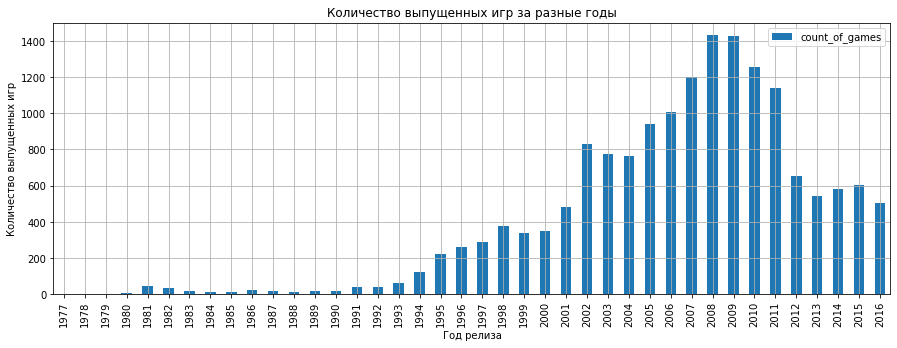

In [ ]:
# Строю диаграмму
games_year.plot.bar( x = 'year_of_release', y = 'count_of_games', grid=True, title='Количество выпущенных игр за разные годы',
                   figsize=(15, 5)).set(xlabel='Год релиза', ylabel='Количество выпущенных игр');

На диаграмме отчетливо видно, что количество выпускаемых игр до 1990 года было незначительным.

В 90-е годы, компьютерные и консольные игры стали набирать большую популярность, как благодаря развитию индустрии (графические улучшения, жанровые разнообразия, нарративное повествование), так и благодаря более широкой доступности устройст для игр.

Считаю, что данные до 1990 года включительно не важны для дальнейшего анализа, в малого количества выпущенных проектов, ограниченности жанров и доступности для пользователей.

In [ ]:
# Удаляем из датафрейма данные о проектах до 1991 года
data = data.query('year_of_release > 1990')
# Проверяем
display(data['year_of_release'].min())

1991

**Вывод по пункту 3.1:**

Активный рост игровой индуствии (как показатель используем количество выпущенных проектов) наблюдается с 1993-1993 года, с резким скачком в 2002 году и максимумом в в 2008 и 2009 годах.

В последующие годы наблюдается спад, о причинах которого не стоит говорить однозначно, обращаясь исключительно к количеству выпускаемых проектов. В последние десятилетие игровая индустрия стала больше бизнесом, чем творчеством, а соответсвенно изменился и подход к выпускаемым проектам. Изменились бюджеты, продажи, маркетинг. Поэтому основным показателем будет правильнее рассматривать продажи проектов.

Кроме того не стоит исключать из внимания тот факт, что именно с 2010 года в нашу жизнь все плотнее стали входить смартфоны, и по состоянию на сегодняший день мобильные устройства являются самой популярной игровой платформой. Подтвердить свою суждения в рамках имеющихся данных, к сожалению, не представляется возможным.

Данные для анализа проектовы выпущенных до 1990 года включительно были убраны из датафрейма и не будут использоваться для дальнейшего анализа.

### Анализ выпущенных игр и продаж по платформам

Группирую игры по количеству продаж

In [ ]:
# Создаю датафрейм с группировкой по платформам и подссчетом выпущенных проектов и количества продаж
platform_year = data.groupby('platform')['total_sales'].agg(
    ['count', 'sum']).sort_values(by='sum', ascending=False).reset_index()
# Переименовываю колонки
platform_year.columns = ['platform', 'games_on_platform', 'sales_on_platform']
# Проверяю
display(platform_year)

,platform,games_on_platform,sales_on_platform
0,PS2,2132,1247.64
1,X360,1236,966.10
2,PS3,1307,932.96
3,Wii,1292,902.85
4,DS,2120,802.76
5,PS,1192,730.09
6,GBA,812,315.28
7,PS4,392,314.14
8,PSP,1195,291.65
9,3DS,512,257.81


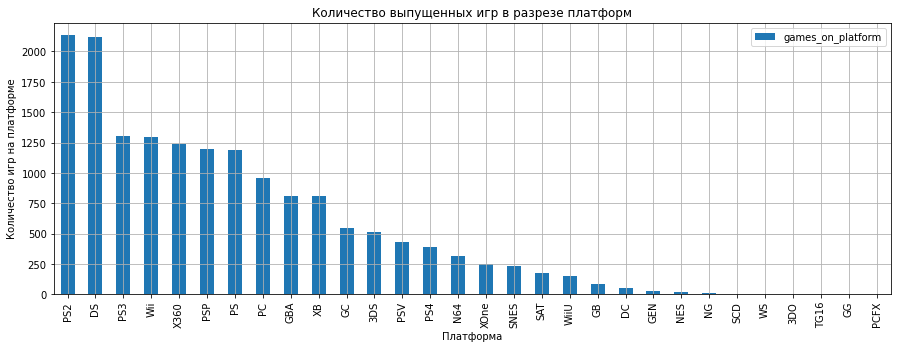

In [ ]:
# Строю график для визуального отображения популярности платформ в разрезе выпущенных игр
platform_year.sort_values(by =  'games_on_platform', ascending= False).plot.bar(
                    x = 'platform', y = 'games_on_platform', grid=True,
                    title='Количество выпущенных игр в разрезе платформ',
                    figsize=(15,5)).set(xlabel='Платформа', ylabel='Количество игр на платформе');

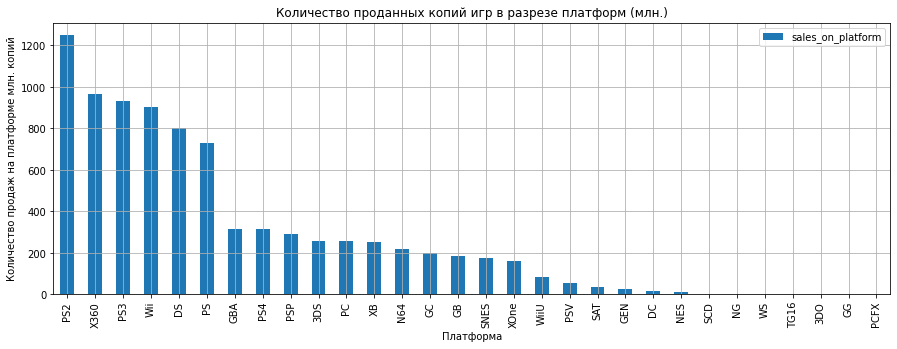

In [ ]:
# Строю график для визуального отображения популярности платформ в разрезе проданных копий игр
platform_year.sort_values(by =  'sales_on_platform', ascending= False).plot.bar(
                    x = 'platform', y = 'sales_on_platform', grid=True,
                    title='Количество проданных копий игр в разрезе платформ (млн.)',
                    figsize=(15,5)).set(xlabel='Платформа', ylabel='Количество продаж на платформе млн. копий');

Визуализирую объемы продаж по разным платформам в виде кольцевой диаграммы

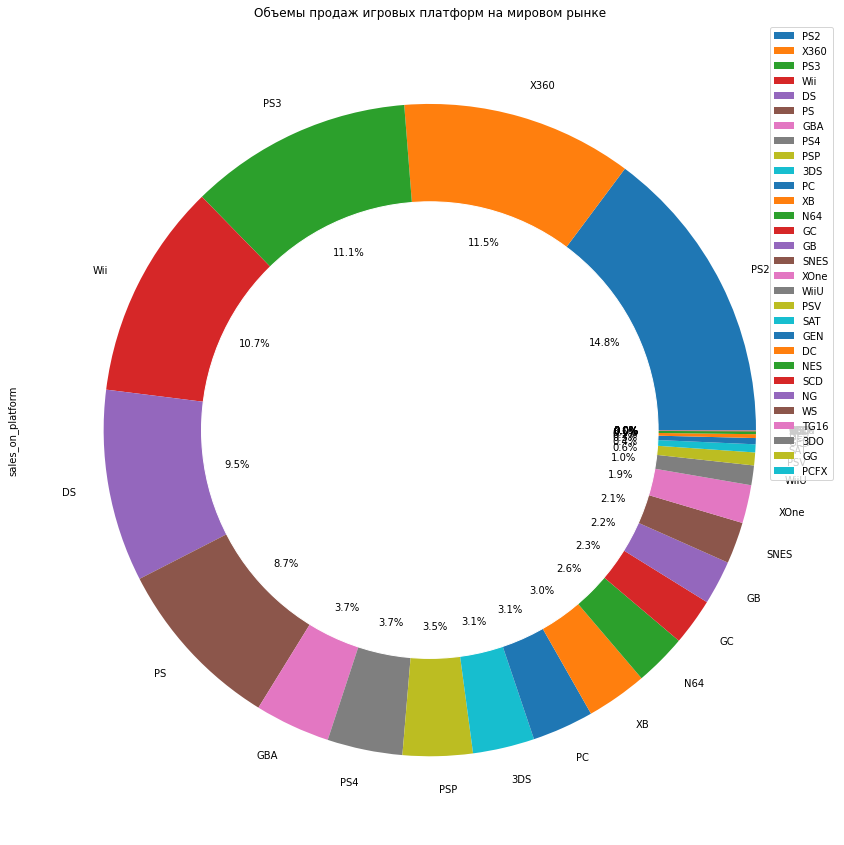

In [ ]:
# Строю круговую диаграмму
platform_year.plot(kind = 'pie', y ='sales_on_platform', autopct='%1.1f%%', figsize= (15,15),
                         title = 'Объемы продаж игровых платформ на мировом рынке', labels = platform_year['platform']
                         );
# Добавляю белый круг в центр, получаем эффект пончика (спасибо https://www.python-graph-gallery.com)
my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle);

Среди всех представленных платформ особо выделяются следующие:

- PS2 (PlayStation 2 от Sony)
- X360 (X-Box 360 от MicroSoft)
- PS3 (PlayStation 3 от Sony)
- Wii (игровая консоль от Nintendo)
- DS (игровая консоль от Nintendo)
- PS (PlayStation от Sony)

Если рассмотреть топ-6 платформ с привязкой к компаниями, то увидим следующие доли:
- Sony - 34,6 %
- Nindendo - 20,2 %
- MicroSoft - 11,5 %

По количеству выпущенных игр выделяется так же PSP, однако продажи у нее относительно скромные.

В то же время платформа GB (GameBoy) показывает неприлично высокое соотношение объема проданных копий к количеству выпущенных игр (184.17 млн. проданных копий игр при общем количестве проектов равных 84)

Т.к. в объемах продаж отчетливо выделяются 6 платформ, то их предлагаю рассмотреть в дальнейшем анализе

In [ ]:
# Топ-6 платформ в разрезе объемов продаж:
top_platforms = platform_year.head(6)['platform']
display(top_platforms)

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
Name: platform, dtype: object

In [ ]:
# Группирую объемы продаж по годам релиза в рамках топ платформ:
top = data.query('platform in @top_platforms').pivot_table(
                       index='year_of_release', columns = 'platform',
                       values = 'total_sales', aggfunc = 'sum')
display(top)

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,170.95,NaN,NaN,NaN,NaN
1999,NaN,145.58,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN
2002,NaN,6.67,206.60,NaN,NaN,NaN


Визуализирую динамику продаж по годам

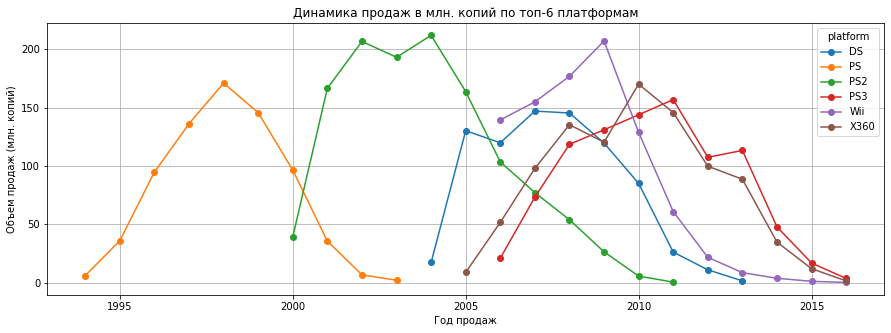

In [ ]:
# Строю диаграмму рассеяния
top.plot(grid=True, figsize=(15, 5), marker='o', title = 'Динамика продаж в млн. копий по топ-6 платформам').set(
                                     xlabel = 'Год продаж', ylabel = 'Объем продаж (млн. копий)');

На общей диаграмме хорошо видна зависимость популярности платформы и сменяемости поколения.

На примере игровых консолей Sony виден рост популярности в начале жизненного цикла консоли, максимум в середине (как благодоря тому, что консоль успела широко распространиться у пользователей, так и благодаря тому, что разработчики научились более виртуозно использовать рамки производительности консолей для лучшего результата в своих проектах), далее идет спад популярности, который перекликается с началом жизненного цикла консоли следующего поколения.

In [ ]:
top.describe()

platform,DS,PS,PS2,PS3,Wii,X360
count,10.000000,10.000000,12.00000,11.000000,11.000000,12.000000
mean,80.276000,73.009000,103.97000,84.814545,82.077273,80.508333
std,59.796231,63.732722,80.56159,54.809971,80.120897,57.666569
min,1.540000,2.070000,0.45000,3.600000,0.180000,1.520000
25%,19.497500,13.900000,35.97750,34.360000,6.170000,29.045000
50%,102.280000,65.330000,90.26500,107.360000,60.880000,93.230000
75%,127.557500,126.220000,173.08500,124.725000,147.125000,124.032500
max,146.940000,170.950000,211.81000,156.780000,206.970000,170.030000


Из строки "count" сразу видно, что цикл актуальности консоли, в рамках рассматриваемых 6, составляет от 10 до 12 лет, а в среднем 11.

Но прикинуть на глаз эти данные оказалось легко в конкретном случае.

А так как мы профессионалы, то и сделаем соответствующие расчеты:

In [ ]:
# Среднее "Время жизни платформы"
sum_age_platfotm = 0
count_platfotm = 0
for name in top.columns:
    sum_age_platfotm += top.loc[top[name].notna(), name].count()
    count_platfotm += 1
print('Среднее время жизни платформы:', sum_age_platfotm/count_platfotm)

Среднее время жизни платформы: 11.0


**Вывод по пункту 3.2:**

Была изучена популярность консолей, выявлены явные лидеры (преимущественно это игровые приставки компании Sony).
PS2 (PlayStation 2 от Sony), X360 (X-Box 360 от MicroSoft), PS3 (PlayStation 3 от Sony), Wii (игровая консоль от Nintendo), DS (игровая консоль от Nintendo), PS (PlayStation от Sony)

Определил среднее время жизни игровой платформы на примере 6 самых популярных платформ, показатель составил 11 лет.

Лидерами по продажам в отдельные годы являются консоли PS2 и Wii

В среднем, актуальность платформы составляет от 5 до 8 лет (если принять объект продаж свыше 50 млн. копий игр в год как показатель актуальности)

Наблюдается общее затухание на графике в 2014-2016 годах, связанное с очередной сменой поколения консолей, а следующее поколение не отображено в графике, т.к. недостаточно суммарных продаж для попадания в обозреваемый топ платформ.

### Определение актуального периода для построения прогноза на 2017 год

В прошлом исследовании рассмотрел среднее время жизни игровой платформы среди топ 6 платформ. Вероянее всего, наиболее популярные платформы имеют, соответственно, большее время жизни. Для получения более репрезентативного результата будет уместным посчитать среднее время жизни платформы в разрезе всех имеющихся данных, а не только топовых.

In [ ]:
# Среднее "Время жизни платформы" в разрезе всех платформ
report = data.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
print('Среднее время жизни платформы:', report.groupby('platform').agg({'year_of_release':'nunique'}).mean())

Среднее время жизни платформы: year_of_release    7.1
dtype: float64


При рассмотрении всех представленных платформ, получил среднее время жизни платформы 7 лет.
Устанавливаю актуальные период 2010-2016 гг. для построения прогноза на 2017 год

In [ ]:
# data_actual = data.query('year_of_release >= 2010').reset_index()
# Устанавливаю актуальный период для построения прогноза в рамках 2014-2016 гг.
data_actual = data.query('year_of_release >= 2014').reset_index()
data_actual.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no rating,14.63
1,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no rating,11.68
3,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no rating,7.98


**Вывод:**

Актуальным периодом для определения прогноза на 2017 год выбрал период с 2014 по 2016 года. Для определения периода использовал средний срок жизни игровой платформы среди всех представленных в базе данных.

### Анализ лидеров продаж по платформам

Делаю визиализацию объемов продаж среди ктуальных платформ за период 2014-2016 годов.

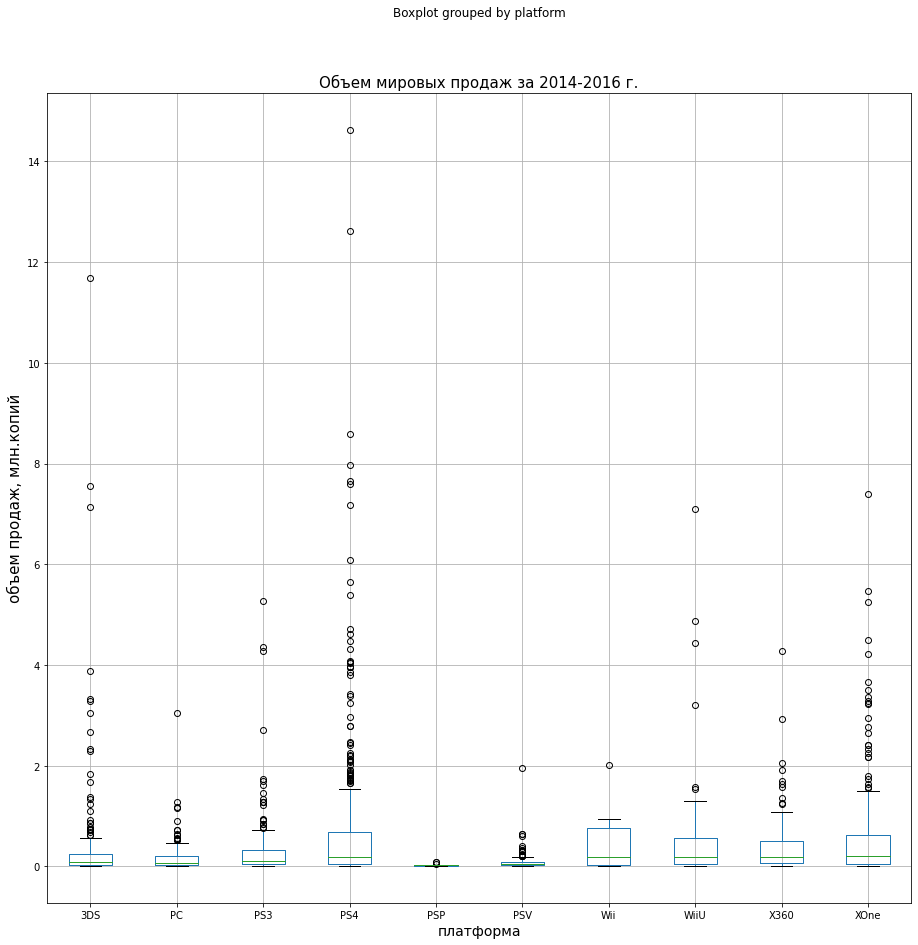

In [ ]:
# диаграмма разброса по актуальным платформам:

data_actual.boxplot(
                column='total_sales', by='platform', figsize=(15, 15))
plt.title('Объем мировых продаж за 2014-2016 г.', size=15)
plt.xlabel('платформа', size=14)
plt.ylabel('объем продаж, млн.копий', size=15)
plt.show()

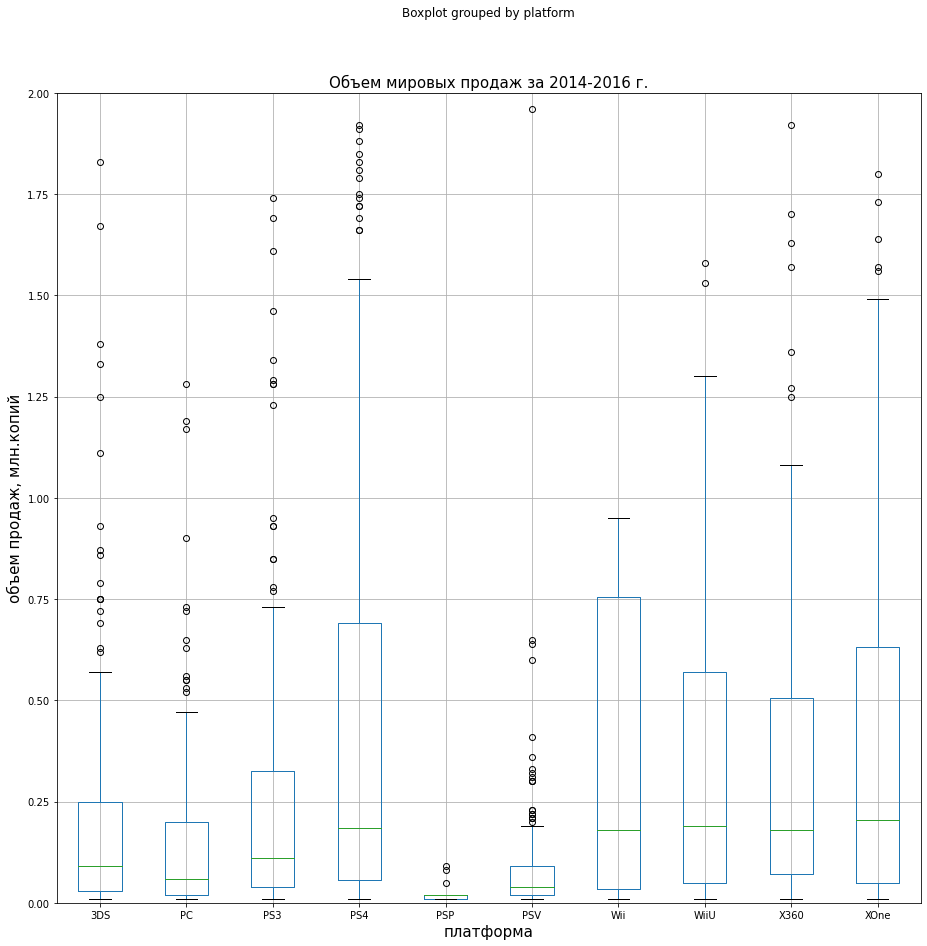

In [ ]:
# диаграмма разброса по актуальным платформам (более детальный осмотр):

data_actual.boxplot(
                column='total_sales', by='platform', figsize=(15, 15)).set(ylim=(0,2))
plt.title('Объем мировых продаж за 2014-2016 г.', size=15)
plt.xlabel('платформа', size=15)
plt.ylabel('объем продаж, млн.копий', size=15)
plt.show()

In [ ]:
# Рассмотрим продажи по актуальным консолям за период 2014-2016 гг.
data_actual_pivot = data_actual.pivot_table(
                       index='year_of_release', columns = 'platform',
                       values = 'total_sales', aggfunc = 'sum')
display(data_actual_pivot)

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Из 12 актуальных платформ считаю целесообразно рассматривать 9.

DS, PS2 и PSP хоть и попали в рассматриваемый период, но в рамках этого же периода перестали поддерживаться

In [ ]:
# Создаю список актуальных платформ, у которых в периоде 2014-2016 годов не закончился срок жизни
actual_platform_list = ['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
# Оставляю в базе данных только данные по актуальным платформам
data_actual = data_actual.query('platform in @actual_platform_list').reset_index()
# Проверяю
display(data_actual['platform'].unique())

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV'],
      dtype=object)

In [ ]:
# Перезапишем данные, с учетом отсортированной базы данных
data_actual_pivot = data_actual.pivot_table(
                       index='year_of_release', columns = 'platform',
                       values = 'total_sales', aggfunc = 'sum')

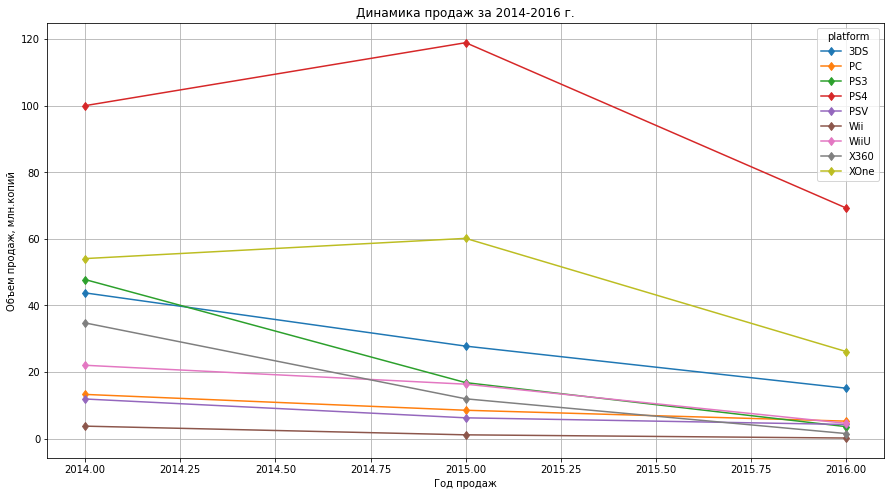

In [ ]:
# Строю график продаж за период 2014-2016 года среди актуальных платформ
data_actual_pivot.plot(grid=True, figsize=(15, 8), marker='d', title = 'Динамика продаж за 2014-2016 г.').set(
                                     xlabel = 'Год продаж', ylabel = 'Объем продаж, млн.копий');

In [ ]:
# Рассмотрю значения продаж
data_actual_pivot.describe()

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,28.893333,9.016667,22.726667,96.050000,7.466667,1.690000,14.326667,16.073333,46.786667
std,14.342445,4.037974,22.664795,25.059579,3.967472,1.847458,8.889411,16.987694,18.127748
min,15.140000,5.250000,3.600000,69.250000,4.250000,0.180000,4.600000,1.520000,26.150000
25%,21.460000,6.885000,10.210000,84.625000,5.250000,0.660000,10.475000,6.740000,40.110000
50%,27.780000,8.520000,16.820000,100.000000,6.250000,1.140000,16.350000,11.960000,54.070000
75%,35.770000,10.900000,32.290000,109.450000,9.075000,2.445000,19.190000,23.350000,57.105000
max,43.760000,13.280000,47.760000,118.900000,11.900000,3.750000,22.030000,34.740000,60.140000


По состоянию на конец 2016 года актуальных предложений в плане игровых платформ осталось 9 шт.

Явным лидером последних лет явяляется платформа PS4 с максимальными результатами продаж в 118,9 млн. копий (2015 год) и 69,25 млн. копий в последнем рассматриваемом году (2016)

Следующей, по количеству проданных копий, идет платформа XOne с показателями: 60,14 млн. копий - максимальные, 26,15 млн. копий - последний год.

Закрывает тройку лидеров платформа 3DS с максимумом продаж 63,2 млн. копий и 15,14 млн. копий за последний год.

**Вывод по пункту 3.4:**

При выборе потенциально прибыльных платформ считаю стоит обратить снимание на 3 популярнейших платформы, описанных выше, а именно: PS4, XOne, 3DS

Платформы относительно молодые (PS4 и XOne), и не смотря на спад объемов продаж, показывают все еще значительно лучший результат, относительно других платформ. В плане срока жизни, даже при рассмотрении общего среднего значения - платформы находятся в середине жизненного цикла. А при рассмотрении через призму срока жизни популярных платформ - только в первой трети.

3DS  не смотря на более долгое присутствие на рынке демонстрирует очень стабильный объем продаж, на фоне других платформ. У данной платформы наименьший спад объемов продаж в течении цикла жизни.

### Анализ влияния оценок критиков и пользователей на продажи

Рассмотрю, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

In [ ]:
# На базе ранее созданного датафрейма создаю новый, с условием совпадения с актуальными платформами
data_actual_corr = platform_year.query('platform in @actual_platform_list').reset_index(drop=True)
# Добавляю новые столбцы, задаю нулевые значения
data_actual_corr['critic_corr'] = 0
data_actual_corr['user_corr'] = 0
# Создаю цикл с перебором названия платформ (console) и подсчетом корреляции между оценками критиков/пользователей
# и общими продажами, с точностью до 0,01
for console in data_actual_corr['platform']:
    data_actual_corr.loc[data_actual_corr['platform'] == console,['user_corr']] = data_actual.query(
        'platform == @console')['total_sales'].corr(data_actual.query('platform == @console')['user_score'])
    data_actual_corr.loc[data_actual_corr['platform'] == console,['critic_corr']] = data_actual.query(
        'platform == @console')['total_sales'].corr(data_actual.query('platform == @console')['critic_score'])
display(data_actual_corr)

,platform,games_on_platform,sales_on_platform,critic_corr,user_corr
0,X360,1236,966.10,0.525723,-0.138445
1,PS3,1307,932.96,0.446575,-0.166761
2,Wii,1292,902.85,NaN,1.000000
3,PS4,392,314.14,0.402661,-0.040132
4,3DS,512,257.81,0.314117,0.215193
5,PC,956,257.31,0.174634,-0.071597
6,XOne,247,159.32,0.428677,-0.070384
7,WiiU,147,82.19,0.370201,0.407926
8,PSV,429,53.81,0.042665,-0.168455


Нельзя не заметить, что оценки пользователей практически не коррелируются с данными общих продаж, немного выделяется платформа WiiU, видимо у пользователей этой платформы своя ламповая атмосфера

При этом оценки критиков более явно коррелируются с объемами продаж, в диапазоне 0,31-0,42 на всех платформах, кроме PSV.

Что это, хороший канал для маркетингового продвижения игры или профессиональная оценка критиков, которая позволяет предугадывать успех проекта? В рамках этого исследования ответа мы не найдем =)

Визуализирую зависимость между оценками пользователей и объемами продаж в виде диаграммы рассеяния

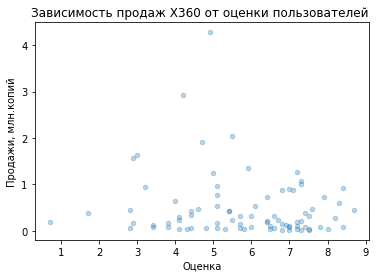

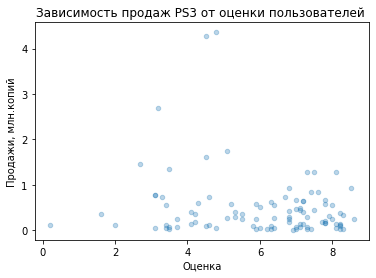

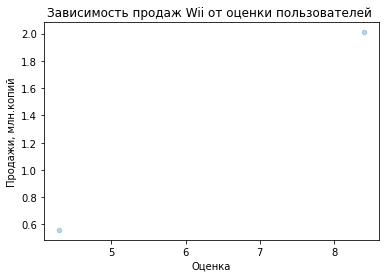

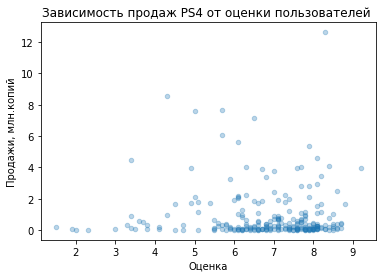

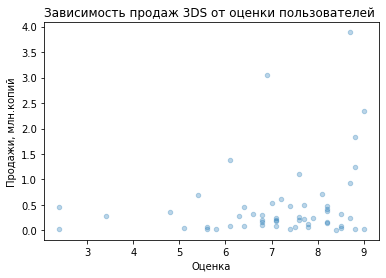

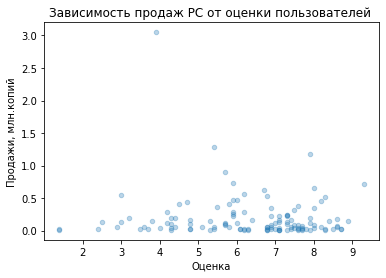

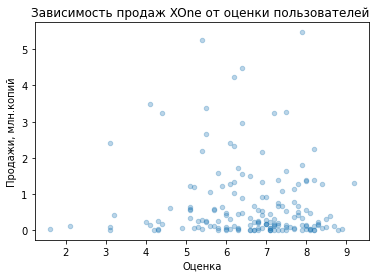

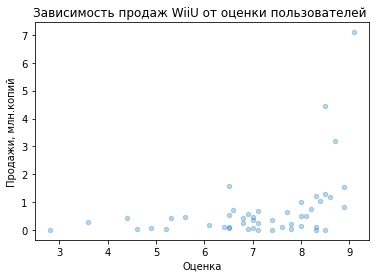

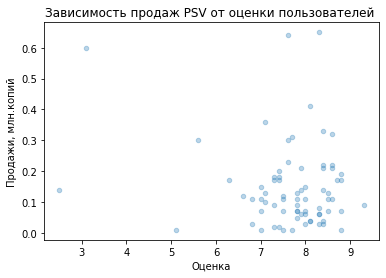

In [ ]:
for console in data_actual_corr['platform']:
    data_actual.query('platform == @console').plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3,
                       title=f'Зависимость продаж {console} от оценки пользователей ').set(
                       xlabel='Оценка', ylabel='Продажи, млн.копий');

В ряде случаев прослеживается четкая корреляция между оценками пользователей и уровнем продаж. Однако, в подавляющем большинстве выбросы в виде максимального уровня продаж присутствуют и при средних оценках.

Повторим визуализацию для зависимость между оценками критиков и объемами продаж

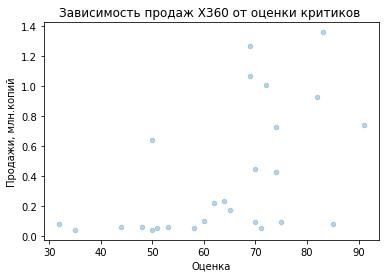

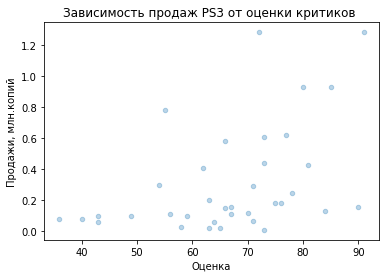

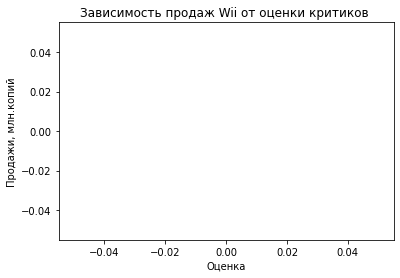

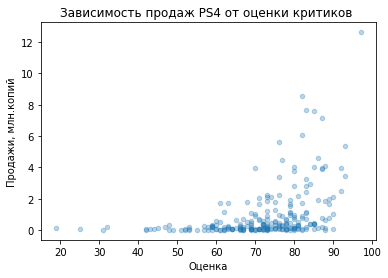

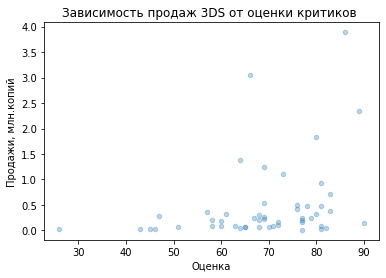

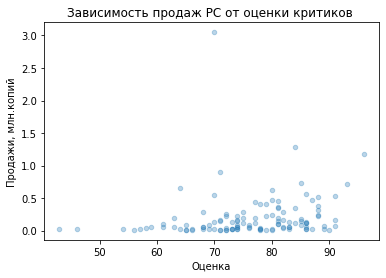

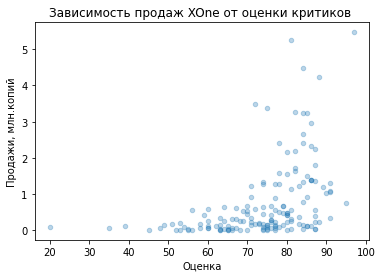

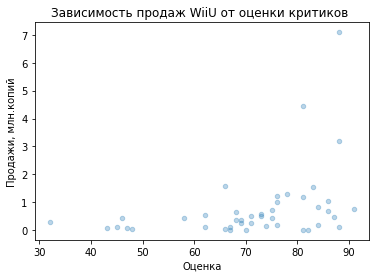

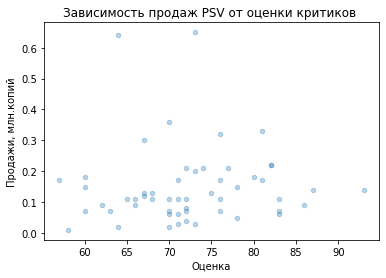

In [ ]:
for console in data_actual_corr['platform']:
    data_actual.query('platform == @console').plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3,
                       title=f'Зависимость продаж {console} от оценки критиков ').set(
                       xlabel='Оценка', ylabel='Продажи, млн.копий');

Видимо вот она, "сила бренда" Call of Duty.

При рассмотрении зависимости в паре оценки критиков и общих продаж наблюдается ожидаемая тендеция: выше оценки - больше продажи. Можно выделить консоль Wii, где наиболее продаваемые проекты расположены ближе к середине графика (уровень оценки 70-80), и PSV где ни оценки критиков, ни народное признание не коррелирует с уровнем продаж

**Вывод по пункту 3.5:**

Изначально может показаться логичным, что именно оценки игроков должны ярко отражать признание проекта, а следовательно ярко коррелировать с уровнем продаж. Но результаты полученные в рамках этого исследования, и применимые к тому набору данных, который у нас есть, отвергает эту гипотезу.

Оценки критиков, напротив, в разрезе всех актуальных платформ практически в равной степени коррелируют с уровнем продаж.

В каждом из случаев видны выбросы, особенно яркий на платформе PSV, видимо это именно те проекты, где "сердцу не прикажешь", хотя головой высокие оценки им не поставишь.

### Распределение игр по жанрам

Рассмотрю суммарные продажи на всех актуальных платформах по жанрам

In [ ]:
genre_sales_total = data_actual.query('platform in @actual_platform_list').pivot_table(
                       index='genre', columns = 'platform',
                       values = 'total_sales', aggfunc = 'sum').sum(axis = 1).sort_values(ascending=False).reset_index()
genre_sales_total.columns = ['genre', 'total_sales']
display(genre_sales_total)

,genre,total_sales
0,Action,199.16
1,Shooter,170.94
2,Sports,109.39
3,Role-Playing,101.44
4,Misc,37.53
5,Fighting,28.22
6,Racing,27.52
7,Platform,18.09
8,Adventure,17.50
9,Simulation,13.13


Строю гистрограмму с распределение объемов продаж по жанрам

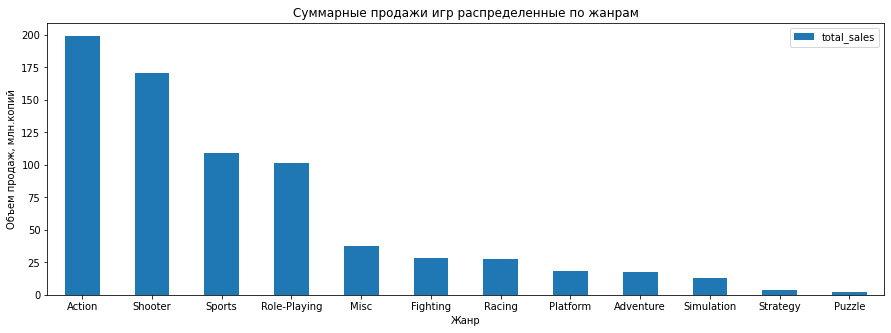

In [ ]:
genre_sales_total.plot.bar(x='genre', figsize=(15,5), rot=0).set(
                       title = 'Суммарные продажи игр распределенные по жанрам',
                       xlabel = "Жанр", ylabel = "Объем продаж, млн.копий" );

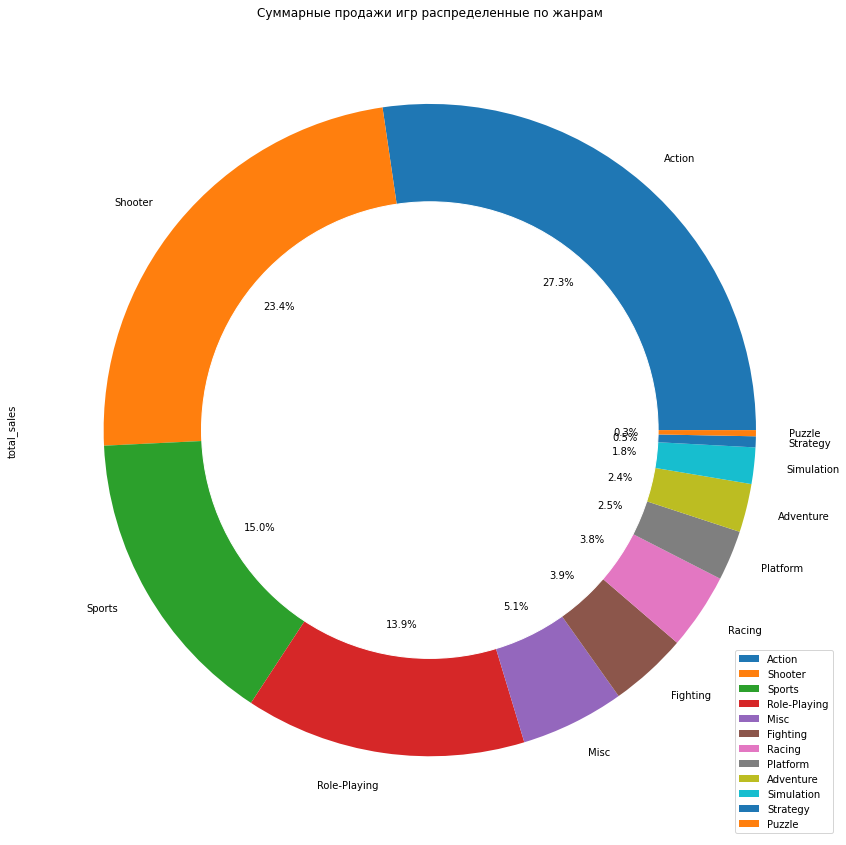

In [ ]:
# Строю круговую диаграмму

genre_sales_total.plot(kind = 'pie', y ='total_sales', autopct='%1.1f%%', figsize= (15,15),
                         title = 'Суммарные продажи игр распределенные по жанрам', labels = genre_sales_total['genre']
                         );

my_circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle);

Лидеры при рассмотрении суммарных продаж выявлены.

Это жанры: Action, Shooter, Sports и Role-Playing

Рассмотрю более подробно продажи распределенные по жанрам

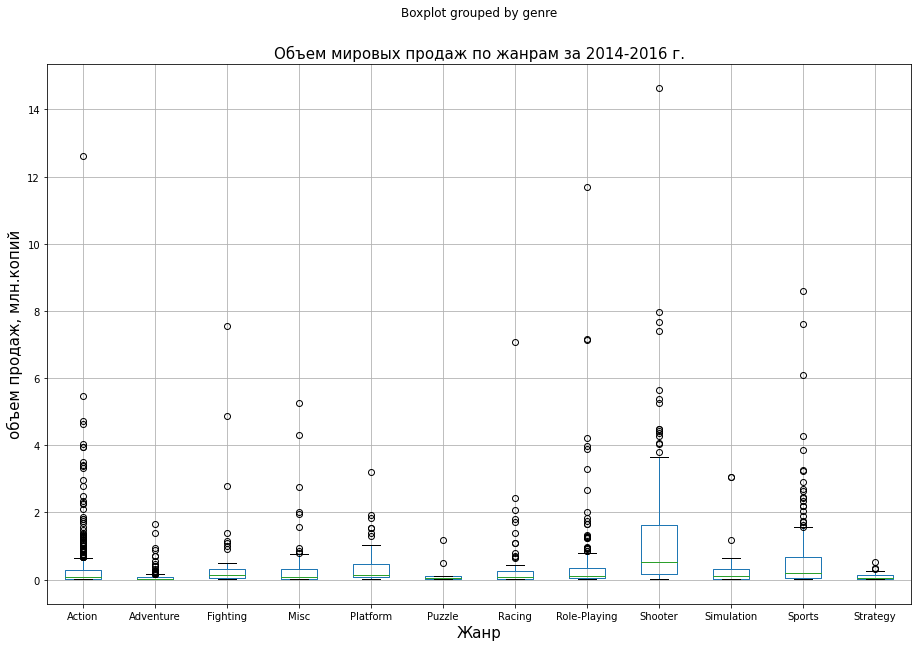

In [ ]:
data_actual.query('platform in @actual_platform_list').boxplot(
    column='total_sales', by='genre', figsize=(15, 10))

plt.title('Объем мировых продаж по жанрам за 2014-2016 г.', size=15)
plt.xlabel('Жанр', size=15)
plt.ylabel('объем продаж, млн.копий', size=15)
plt.show()

Сразу же бросается в глаза, что хоть жанр Action и лидирует по показателю сумм общих продаж, достигаются они благодоря гораздо более большому количеству проектов (видно по плотности графика).

Предлагаю более детально рассмотреть структуру продаж по жанрам в разрезе актуального периода (2014-2016 гг.)

In [ ]:
# Суммарные объемы продаж по жанрам распределенные по годам
data_actual_sales_sum = data_actual.query('platform in @actual_platform_list').pivot_table(
    index='year_of_release', columns='genre',
    values='total_sales', aggfunc='sum').round(2)
display(data_actual_sales_sum)

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,97.15,5.52,15.85,23.36,8.81,1.49,16.66,45.62,65.21,5.58,45.06,0.98
2015,71.90,8.16,7.90,11.57,6.05,0.71,8.07,37.64,67.51,5.66,40.84,1.85
2016,30.11,3.82,4.47,2.60,3.23,0.01,2.79,18.18,38.22,1.89,23.49,1.13


In [ ]:
# Медианные значения объемы продаж по жанрам распределенные по годам
data_actual_sales_median = data_actual.query('platform in @actual_platform_list').pivot_table(
    index='year_of_release', columns='genre',
    values='total_sales', aggfunc='median').round(2)
display(data_actual_sales_median)

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,0.21,0.05,0.13,0.18,0.83,0.05,0.17,0.11,0.66,0.12,0.46,0.06
2015,0.08,0.03,0.10,0.19,0.10,0.04,0.15,0.11,0.92,0.20,0.12,0.04
2016,0.05,0.02,0.08,0.04,0.10,0.01,0.05,0.12,0.24,0.02,0.12,0.06


In [ ]:
# Средние значения объемы продаж по жанрам распределенные по годам
data_actual_sales_mean = data_actual.query('platform in @actual_platform_list').pivot_table(
    index='year_of_release', columns='genre',
    values='total_sales', aggfunc='mean').round(2)
display(data_actual_sales_mean)

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,0.53,0.08,0.69,0.58,0.88,0.21,0.62,0.51,1.39,0.51,0.85,0.12
2015,0.29,0.15,0.38,0.30,0.47,0.12,0.45,0.48,1.99,0.38,0.69,0.12
2016,0.17,0.07,0.28,0.08,0.22,0.01,0.12,0.34,0.81,0.11,0.49,0.09


In [ ]:
# Изучу количество выпущенных проектов по жанрам
data_actual_sales_count = data_actual.query('platform in @actual_platform_list').pivot_table(
    index='year_of_release', columns='genre',
    values='total_sales', aggfunc='count').round(2)
display(data_actual_sales_count)

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year_of_release,,,,,,,,,,,,
2014,185,71,23,40,10,7,27,89,47,11,53,8
2015,250,54,21,39,13,6,18,78,34,15,59,16
2016,178,56,16,32,15,1,24,54,47,18,48,13


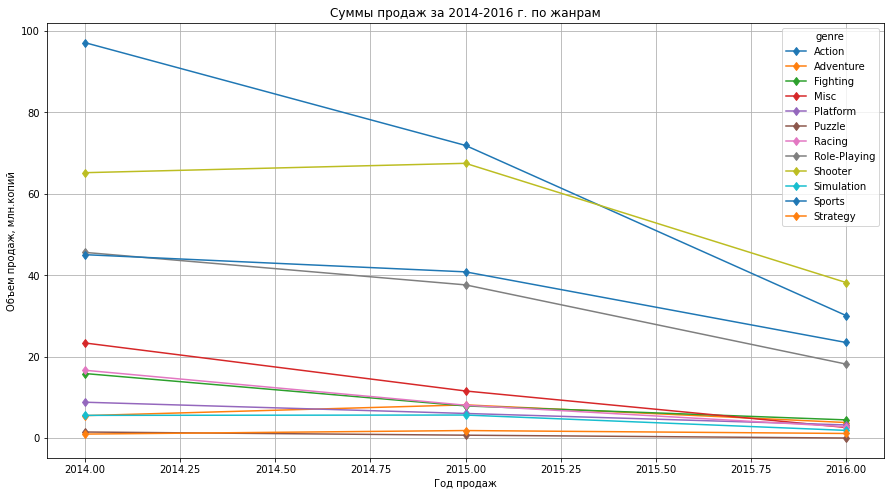

In [ ]:
# Строю график сумм продаж за период 2014-2016 года с распределением по жанрам
data_actual_sales_sum.plot(grid=True, figsize=(15, 8), marker='d',
                            title = 'Суммы продаж за 2014-2016 г. по жанрам').set(
                            xlabel = 'Год продаж', ylabel = 'Объем продаж, млн.копий');

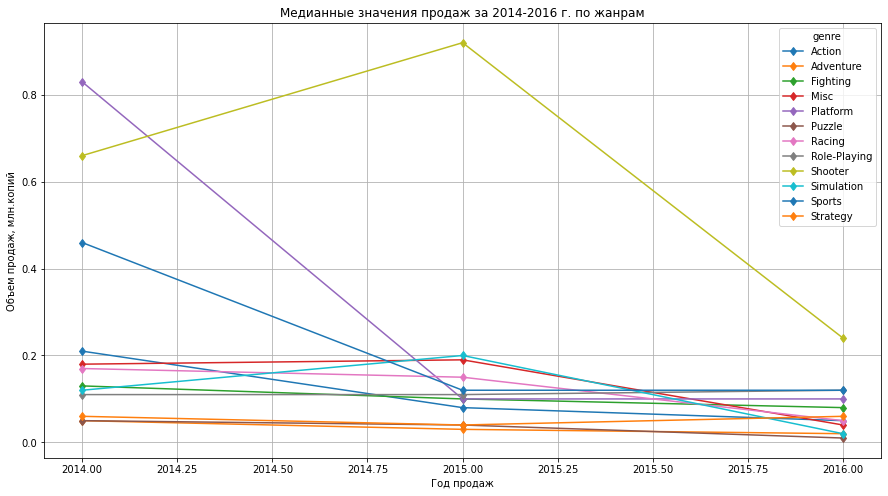

In [ ]:
# Строю график медианных значений продаж за период 2014-2016 года с распределением по жанрам
data_actual_sales_median.plot(grid=True, figsize=(15, 8), marker='d',
                                title = 'Медианные значения продаж за 2014-2016 г. по жанрам').set(
                                xlabel = 'Год продаж', ylabel = 'Объем продаж, млн.копий');

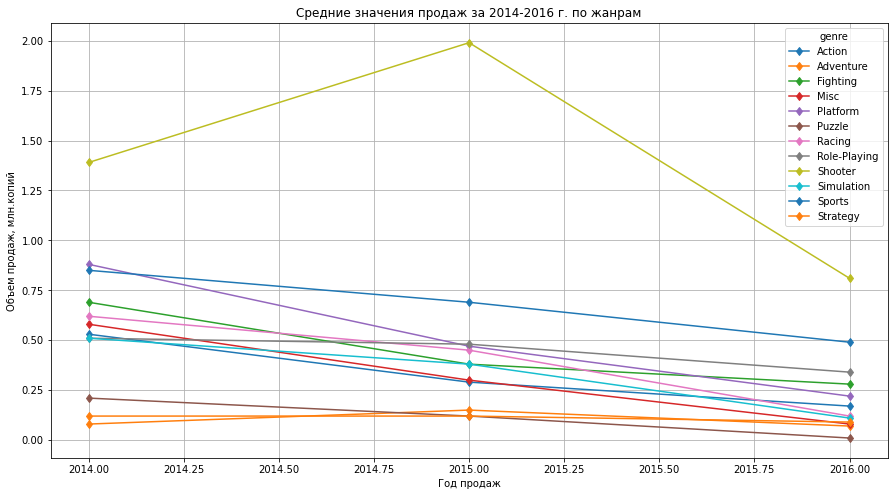

In [ ]:
# Строю график средних значений продаж за период 2014-2016 года с распределением по жанрам
data_actual_sales_mean.plot(grid=True, figsize=(15, 8), marker='d',
                                title = 'Средние значения продаж за 2014-2016 г. по жанрам').set(
                                xlabel = 'Год продаж', ylabel = 'Объем продаж, млн.копий');

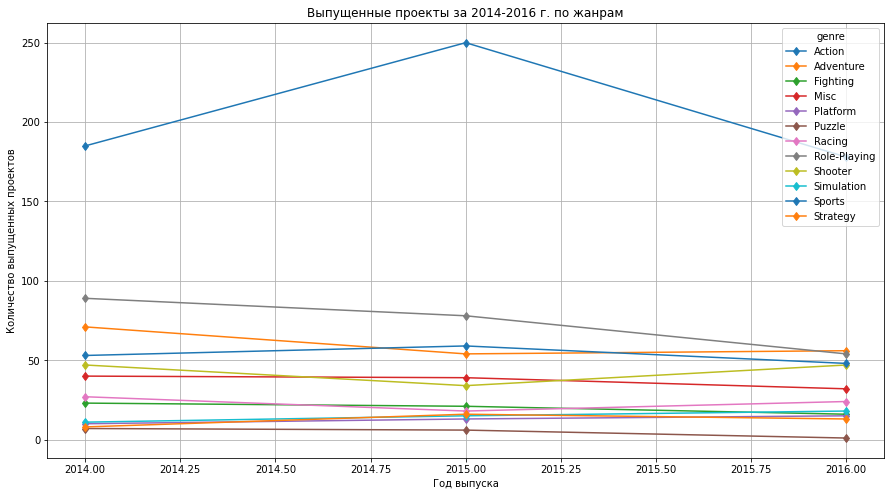

In [ ]:
# Строю график средних значений продаж за период 2014-2016 года с распределением по жанрам
data_actual_sales_count.plot(grid=True, figsize=(15, 8), marker='d',
                                title = 'Выпущенные проекты за 2014-2016 г. по жанрам').set(
                                xlabel = 'Год выпуска', ylabel = 'Количество выпущенных проектов');

**Вывод по пункту 3.6:**

При рассмотрении абсолютной величины продаж однозначными лидерами последних пары лет являются игры следующих жанров: Action, Shooter, Sports и Role-Playing

Изучив средние, медианные значения и общее число проектов по годам, можно сделать вывод, что лидирующие позиции сумм продаж у жанра Action являются следствием кратно большего количества выпускаемых проектов, по отнощению к другим жанрам. При это в последний год жанр Shooter, даже при меньшем количестве предстваленных проектов, занял лидирующее место по количеству проданных копий.

Такие жанры как Adventure, Puzzle, Strategy являются наименее популярными жанрами.

К самым прибыльным жанрам можно отнести Shooter, Sports, Role-Playing.

Жанр Action на рынке представлен крайне обширно, вероятно даже рынок перенасыщен этим жанром.

**Вывод по разделу 3:**

В рамках исследований и анализа проведенным в этом разделе были сделаны следующие выводы:

Активный рост игровой индуствии (как показатель используем количество выпущенных проектов) наблюдается с 1993-1993 года, с резким скачком в 2002 году и максимумом в в 2008 и 2009 годах.

Самыми популярными платформами за имеющийся период являются: PS2 (PlayStation 2 от Sony), X360 (X-Box 360 от MicroSoft), PS3 (PlayStation 3 от Sony), Wii (игровая консоль от Nintendo), DS (игровая консоль от Nintendo), PS (PlayStation от Sony).

Средний срок жизни самых популярных платформ составляет 11 лет, средний срок жизни всех представленных платформ составляет 7 лет.

Максимальные объемы рынка замечены в период 2008-2009 гг., а с 2010 года наблюдается спад.

Наблюдается корреляция между объемами продаж и оценками критиков, практически на всех платформах (кроме PSV) в более менее равных коэфициентах. Корреляция между оценками пользователей и объемами продаж не наблюдается.

Наиболее перспективными жанрами, при построении прогнозов на будующий 2017 год являются следующие жанры: Shooter, Sports и Role-Playing.

## Портрет пользователя каждого региона

### Самые популярные платформы в каждом регионе (топ-5)

Рассмотрю популярность различных платформ в различных регионах.

При анализе считаю необходимым изучить как абсолютные значения проданных копий, так и медианные значения

In [ ]:
# Для дальнейшего удобства создаю словарь
regions = {
    'na_sales': 'Северная Америка',
    'eu_sales': 'Европа',
    'jp_sales': 'Япония',
    'other_sales': 'Другие регионы'
}

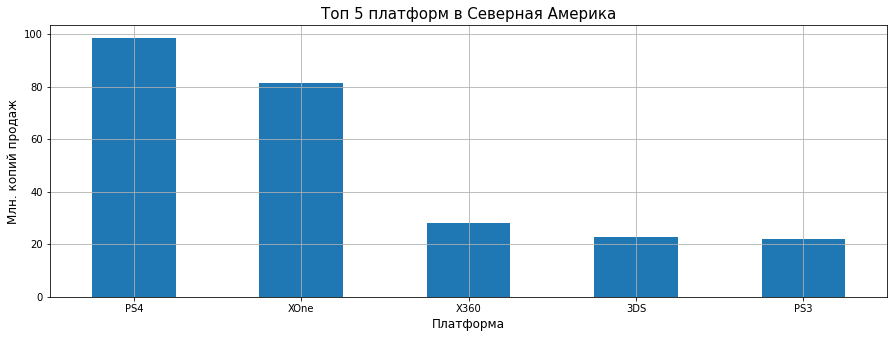

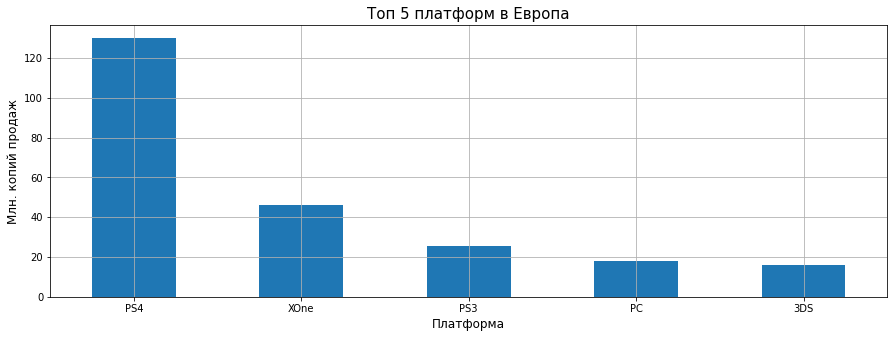

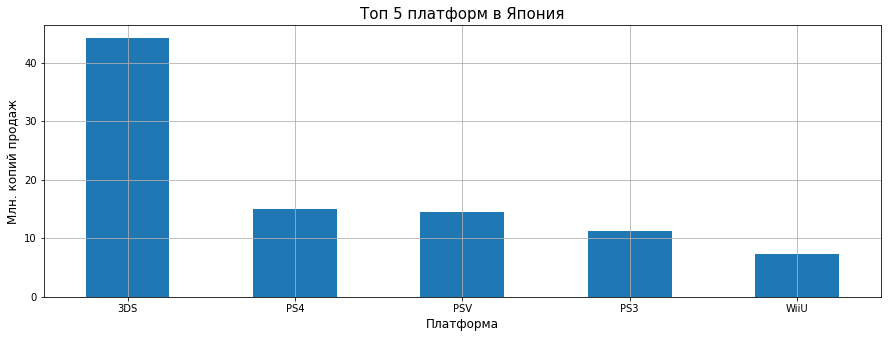

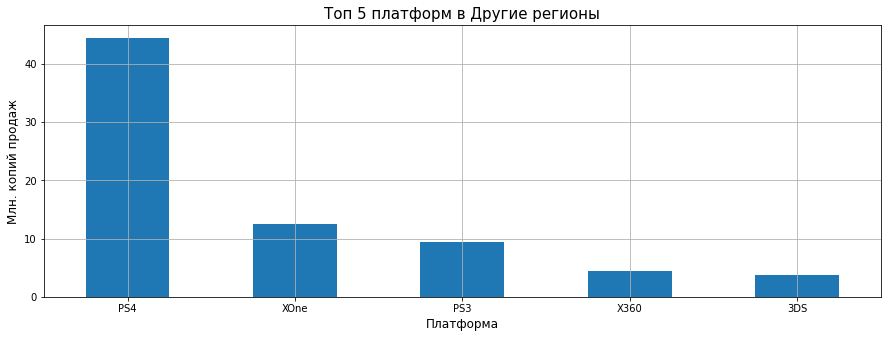

In [ ]:
# Строю гистрограммы по каждому региону
for index in regions:
    data_actual.query('platform in @actual_platform_list').pivot_table(
        index='platform', values=index, aggfunc='sum').sum(
        axis=1).sort_values(ascending=False).head(5).plot(
        kind='bar', grid=True, figsize=(15, 5), rot=0);
    plt.title(f'Топ 5 платформ в {regions[index]}', size=15)
    plt.xlabel('Платформа', size=12)
    plt.ylabel('Млн. копий продаж', size=12)
    plt.show()

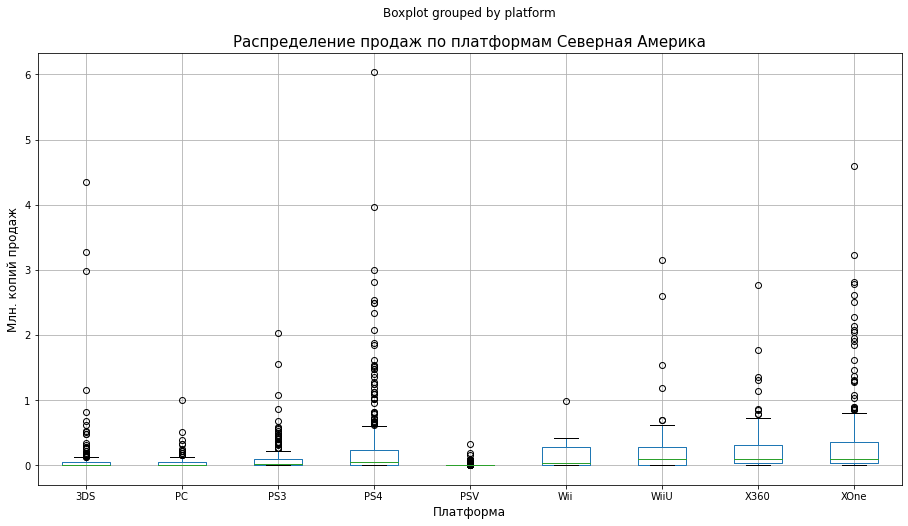

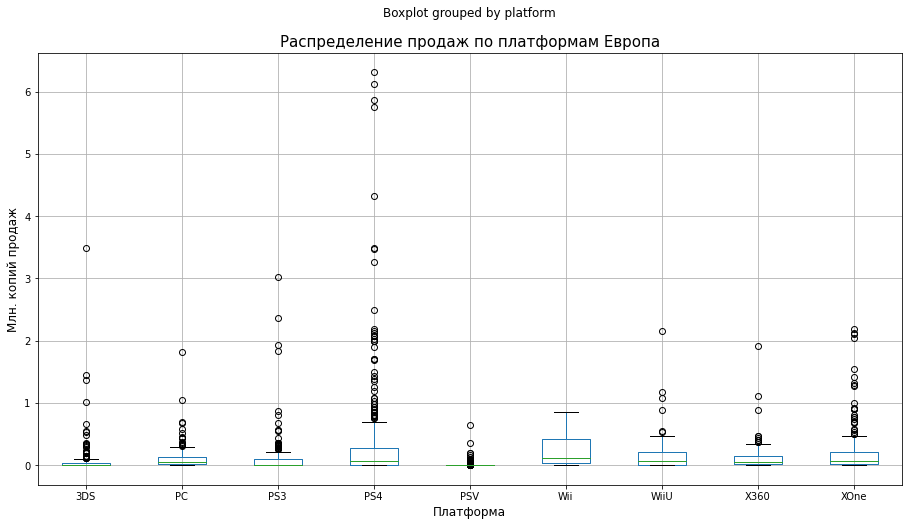

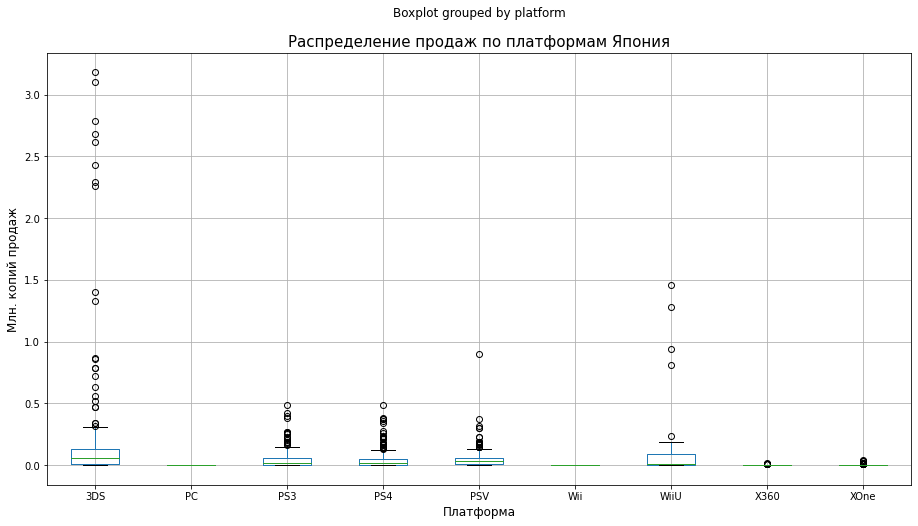

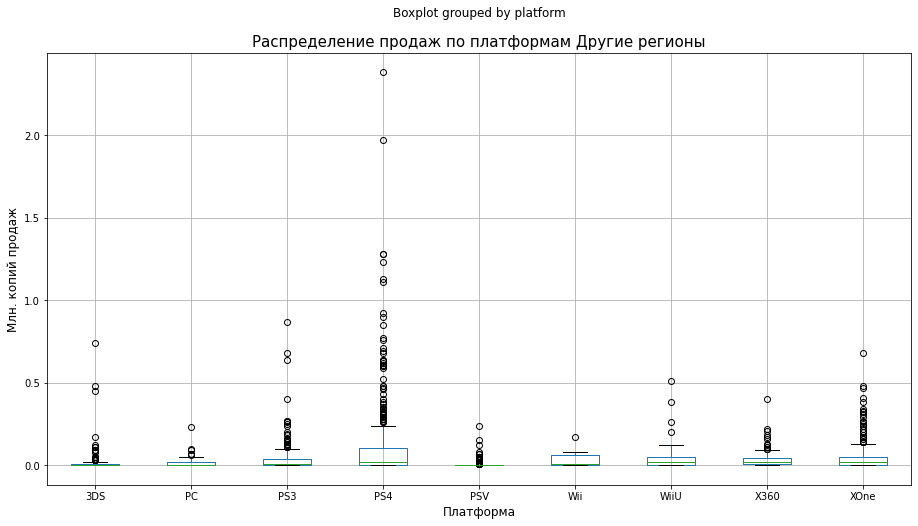

In [ ]:
for index in regions:
    data_actual.query('platform in @actual_platform_list').boxplot(column=index, by='platform', figsize=(15, 8));
    plt.title(f'Распределение продаж по платформам {regions[index]}', size=15);
    plt.xlabel('Платформа', size=12);
    plt.ylabel('Млн. копий продаж', size=12);
    plt.show();

Рассмотрим графики в диапазоне до 1 млн.

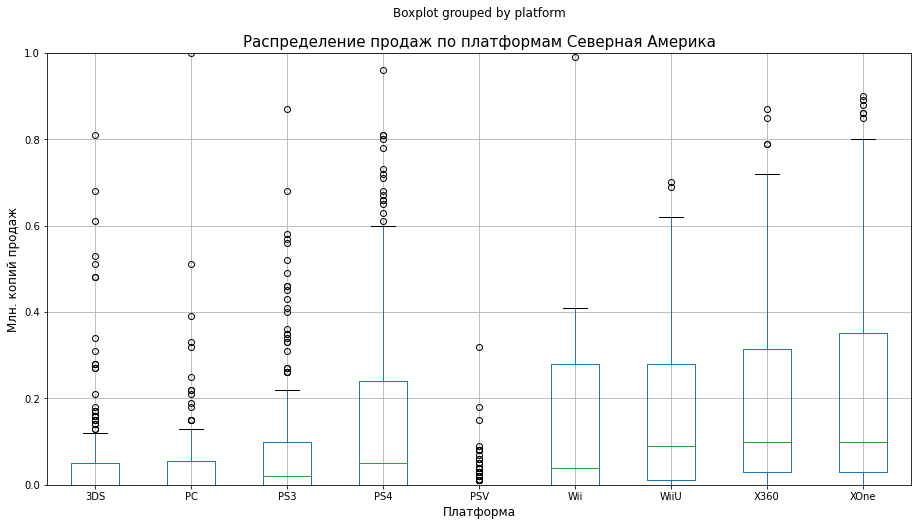

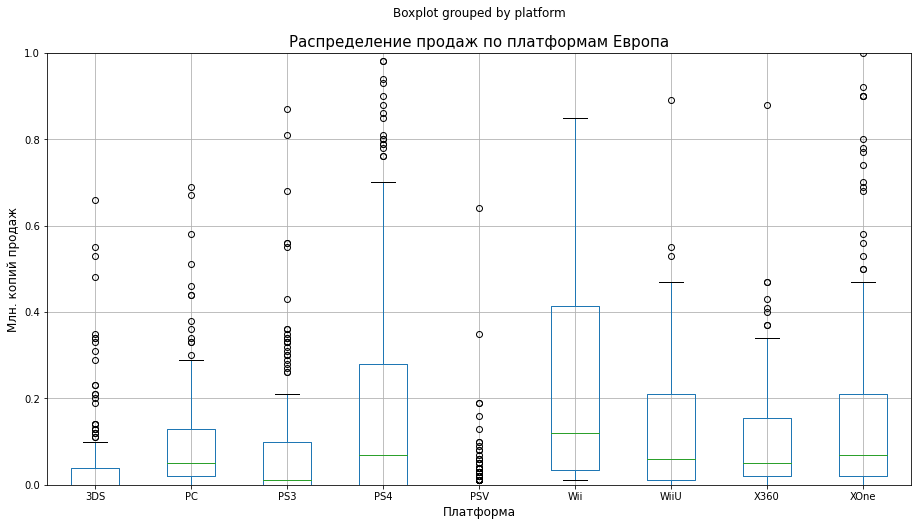

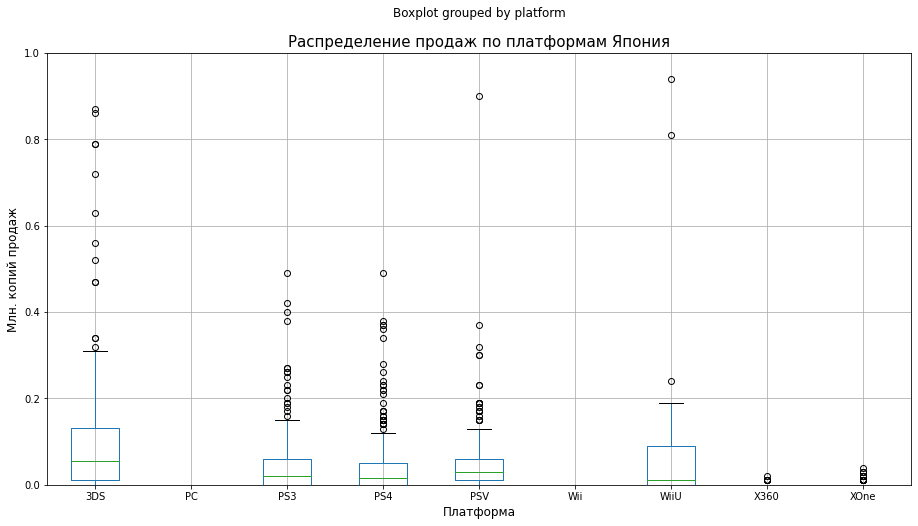

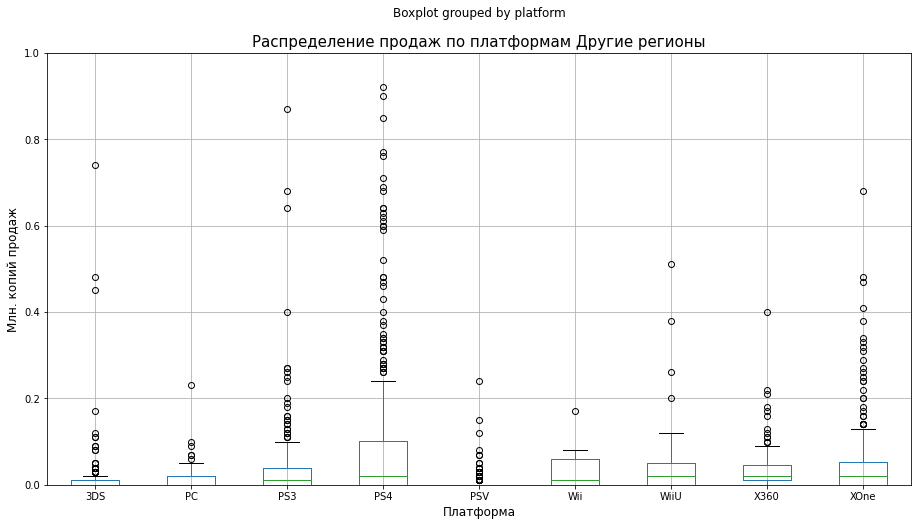

In [ ]:
for index in regions:
    data_actual.query('platform in @actual_platform_list').boxplot(column=index, by='platform', figsize=(15, 8));
    plt.ylim(0, 1)
    plt.title(f'Распределение продаж по платформам {regions[index]}', size=15);
    plt.xlabel('Платформа', size=12);
    plt.ylabel('Млн. копий продаж', size=12);
    plt.show();

**Вывод по пункту 4.1:**

Данные медианных значений несколько отличаются от абсолютных значений продач, но хорошо прослеживается связь

В Северной Америке, в абсолютных числах продаж лидирует Х360, далее идет PS3, консоли прошли основной цикл жизни в рамках обозначенного ранее актуального периода. Если рассмотреть медианные значения, то основными лидерами уже будут X360 и XOne, американские пользователи предпочитают американские консоли.

Касательно Европейского региона ситуация зеркальная, абсолютными лидерами в общих продажах является PS3, после нее X360. Но если рассмотреть медианные значения, то лучший показатель (хоть и с небольшим отрывом) будет принадлежать PS4.

На рынке Японии преобладают продажи проектов для продуктов компании Nindendo.

Остальные регионы предпочитаю консоли компании Sony, в меньшей степени Microsoft

Медианные значения, в данном случае служат хорошим маркером при оценке продажи игр на молодых консолях на конкретных рынках сбыта. Абсолютные цыфры продаж ожидаемо будут выше у консолей которые завершают свой жизненный цикл.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
При рассмотрении значений за период 2014-2016 гг. представляется другая картина, а именно:
    
На Американском рынке четко прослеживается лидирующие позиции консолей XOne и X360. Показатели PS4 так же достаточно высоки, но, скорее, благодоря успешным проектам, продавшимся большим количеством копий
    
В Европейской регионе, при рассмотрении медианных значений, пользуется наибольшей популярностью платформа Wii, далее идут консоли нового поколения, а именно PS4 и XOne
    
Но практически во всех регионах, обсолютные продажи наблюдаются у консоли PS4, вероятно благодоря мега популярным эксклюзивам и большим количеством продаж
</br>
</div>

### Самые популярные жанры в каждом регионе (топ-5)

Группирую данные актуального периода по жанрам и регионам и построим диаграммы в разрезе актуальных платформ:

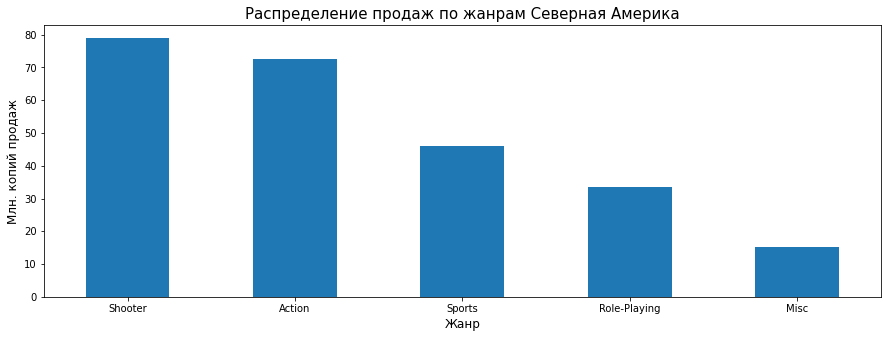

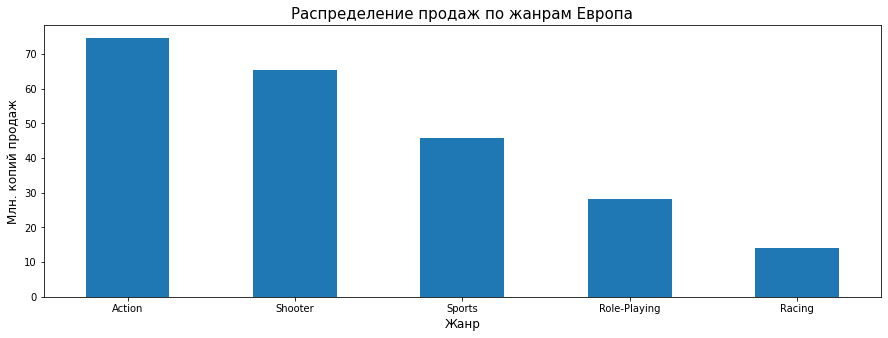

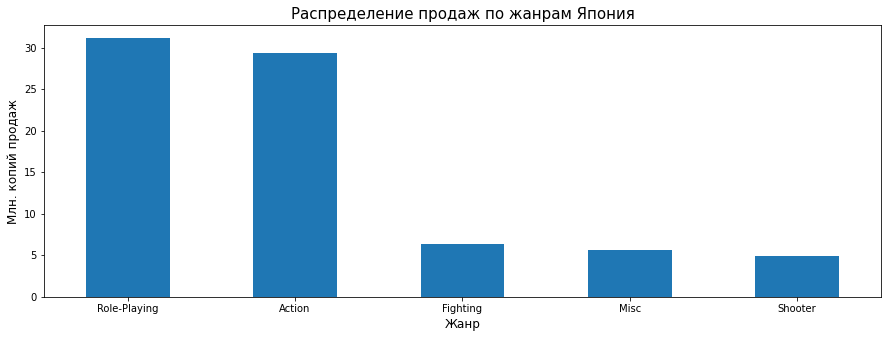

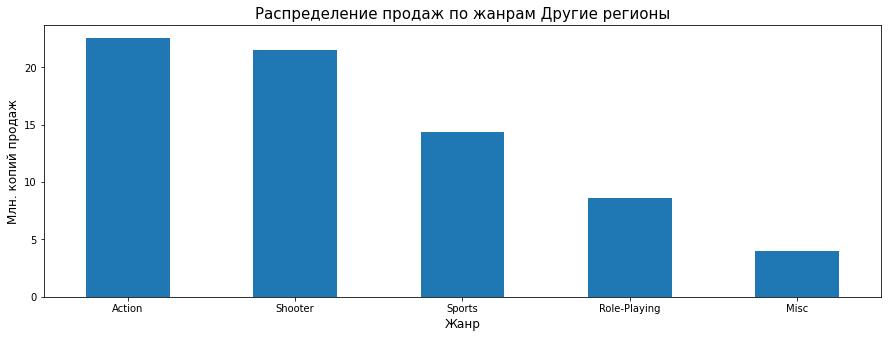

In [ ]:
for index in regions:
    data_actual.query('platform in @actual_platform_list').pivot_table(index='genre', values=index, aggfunc='sum').sum(
    axis=1).sort_values(ascending=False).head(5).plot(kind='bar', figsize=(15, 5), rot=0)
    plt.title(f'Распределение продаж по жанрам {regions[index]}', size=15);
    plt.xlabel('Жанр', size=12);
    plt.ylabel('Млн. копий продаж', size=12);
    plt.show();

**Вывод по пункту 4.2:**

Топ-5 во всех регионах, за исключением Японского рынка, практически идентичны. Единственное отличие, на рынке Северной Америке жанры Misc и Role-Playing поменялись местами, если сравнивать с Европейским рынком и Другими регионами. Подобно даже отношение продаж между жанрами
Японский рынок выглядит более свежо, топ-1 принадлежит Role-Playing (за что отдельный респект), с небольшим отрывом идет жанр Action, остальные жанры продаются заметно хуже.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Первое место, с попеременным успехом, делят между собой жанры Action и Shooter, в зависимости от региона
</br>
</div>

### Влияние рейтинга ESRB на продажи в отдельных регионах

Для дальнейшего удобства восприятия рейтингов, переименовываю значения согласно общедоступным данным

In [ ]:
data_actual['rating'] = data_actual['rating'].replace({
    'EC':'EC (3+)',
    'E':'E (6+)',
    'E10+':'E (10+)',
    'T':'T (13+)',
    'M':'M (17+)',
    'AO':'AO (только для взрослых)',
    'K-A':'E (6+ до 1998 года)',
    'RP':'Рейтинг ожидается',
    'no rating':'Рейтинг не определен'
})
data_actual.head(5)

,level_0,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Рейтинг не определен,14.63
1,1,42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M (17+),12.62
2,2,47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Рейтинг не определен,11.68
3,3,77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E (6+),8.58
4,4,87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Рейтинг не определен,7.98


In [ ]:
data_actual['rating'].value_counts()

Рейтинг не определен    736
T (13+)                 271
M (17+)                 265
E (6+)                  219
E (10+)                 185
Name: rating, dtype: int64

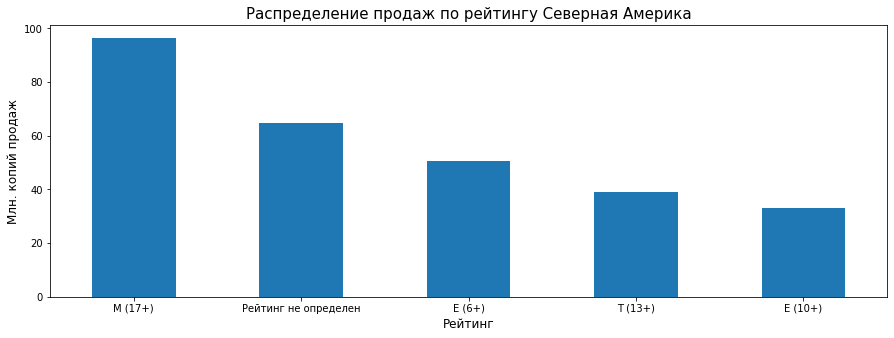

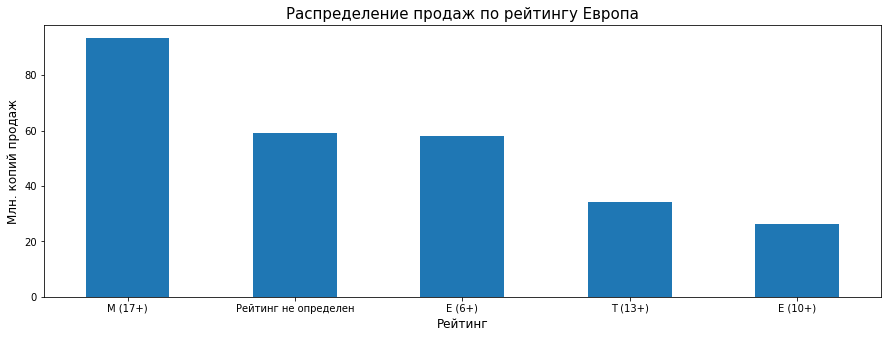

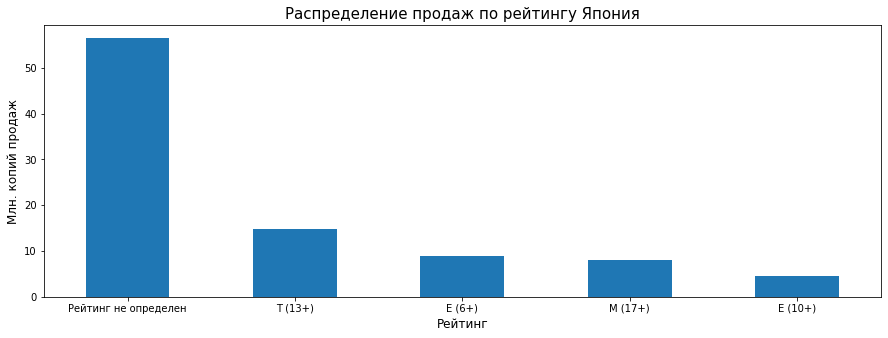

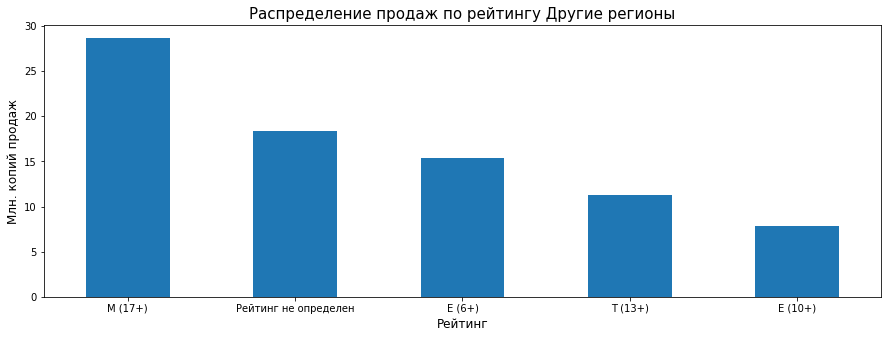

In [ ]:
for index in regions:
    data_actual.query('platform in @actual_platform_list').pivot_table(
        index='rating', values=index, aggfunc='sum').sum(
        axis=1).sort_values(ascending=False).plot(kind='bar', figsize=(15, 5), rot=0);
    plt.title(f'Распределение продаж по рейтингу {regions[index]}', size=15);
    plt.xlabel('Рейтинг', size=12);
    plt.ylabel('Млн. копий продаж', size=12);
    plt.show();

Для детального рассмотрения распределения продаж внутри каждого региона по жанрам построю график боксплот

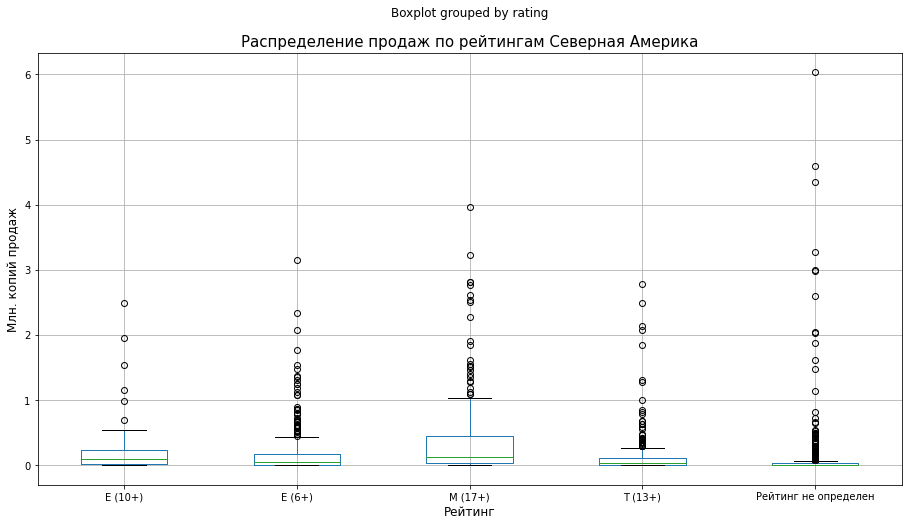

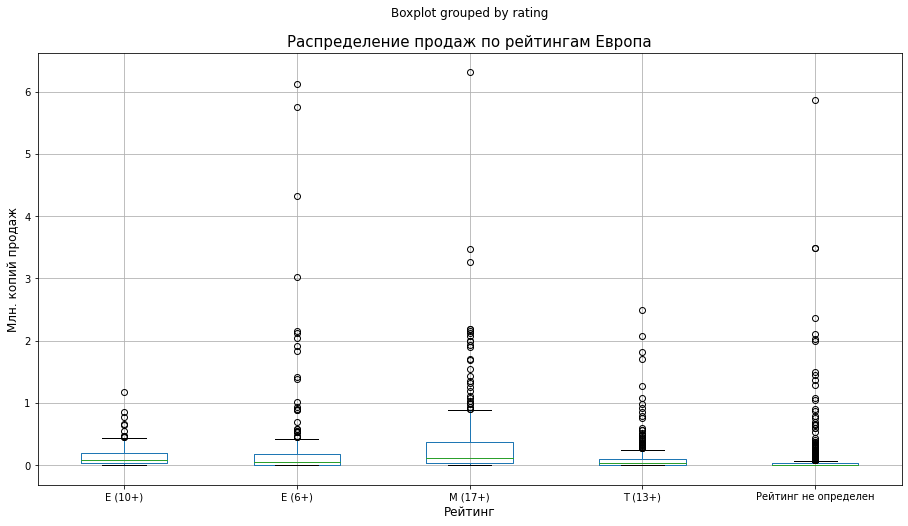

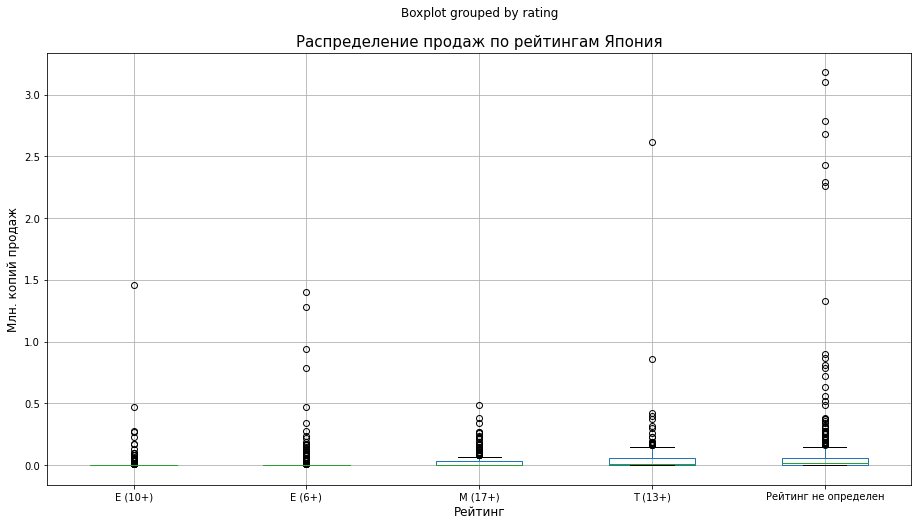

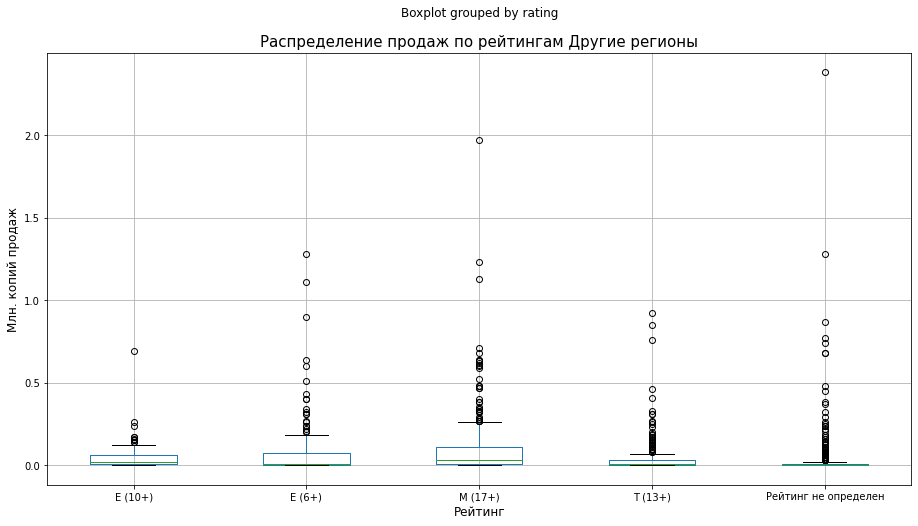

In [ ]:
for index in regions:
    data_actual.query('platform in @actual_platform_list').boxplot(column=index, by='rating', figsize=(15, 8));
    plt.title(f'Распределение продаж по рейтингам {regions[index]}', size=15);
    plt.xlabel('Рейтинг', size=12);
    plt.ylabel('Млн. копий продаж', size=12);
    plt.show();

Рассмотрю тот же график на границах до 1 млн. проданных копий

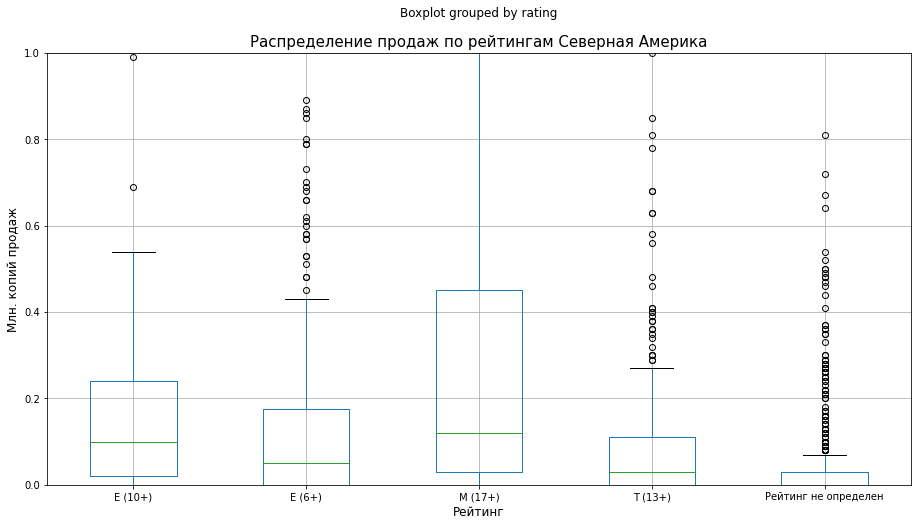

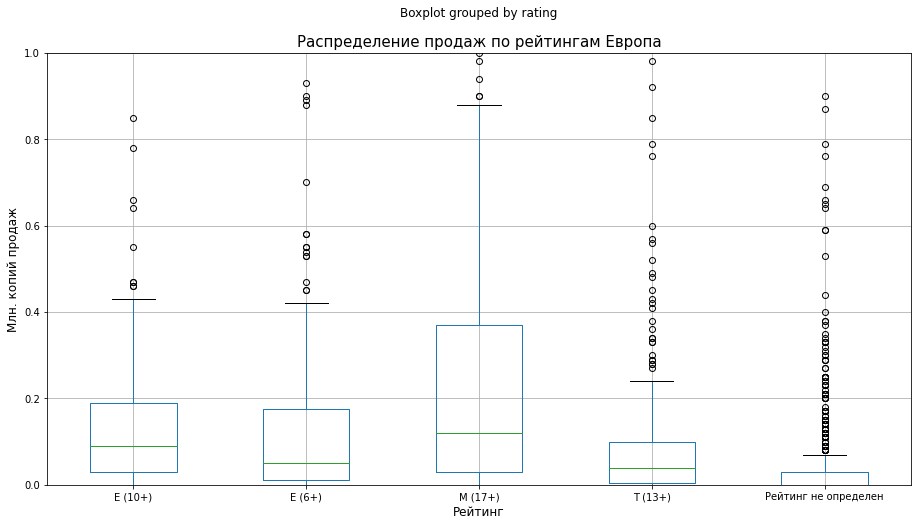

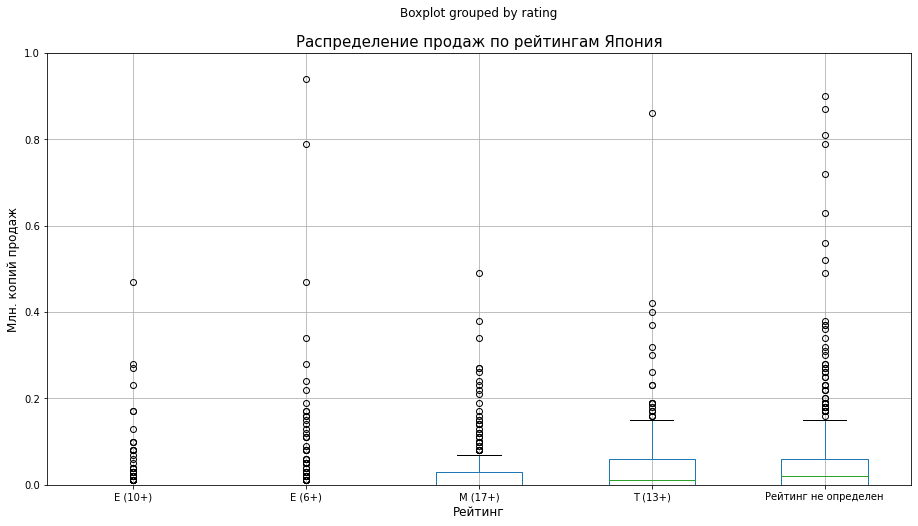

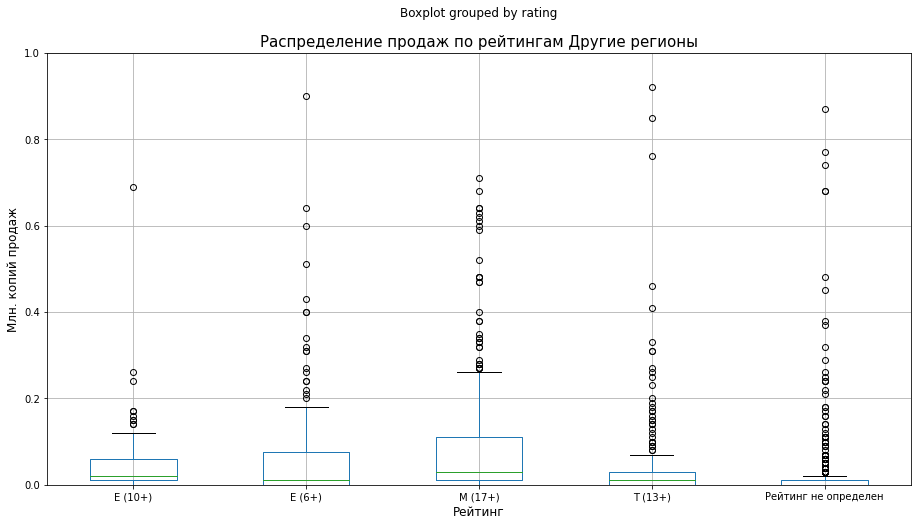

In [ ]:
for index in regions:
    data_actual.query('platform in @actual_platform_list').boxplot(column=index, by='rating', figsize=(15, 8));
    plt.ylim(0, 1)
    plt.title(f'Распределение продаж по рейтингам {regions[index]}', size=15);
    plt.xlabel('Рейтинг', size=12);
    plt.ylabel('Млн. копий продаж', size=12);
    plt.show();

Предполагаю, что распеределение популярности игровых рейтингах в разных регионах, напрямую связано с жанровыми предпочтениями.
Рассмотрю как распределены рейтинги внутри жанрах в разрезе проданных копий.

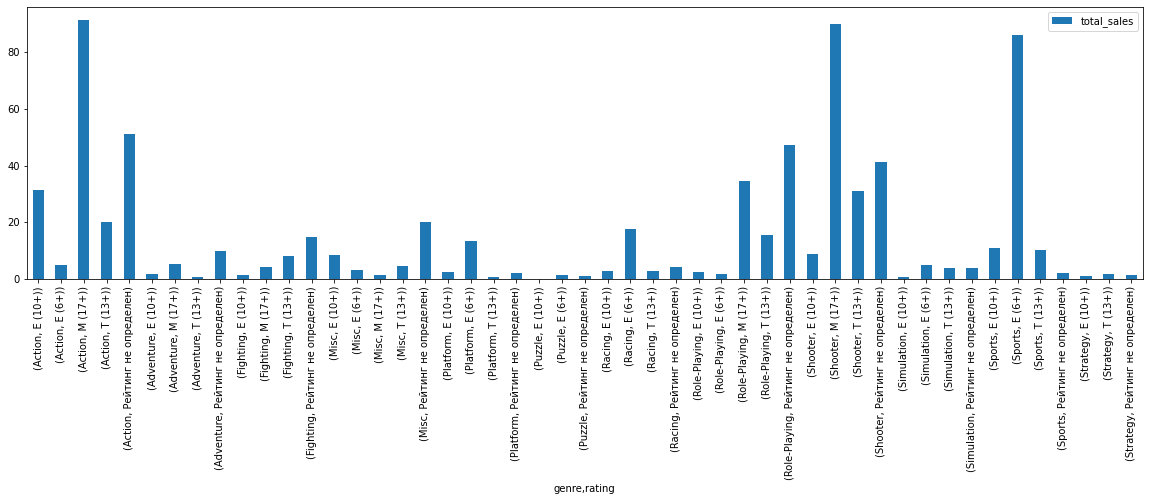

In [ ]:
data_actual.query('platform in @actual_platform_list').pivot_table(
    index=["genre", "rating"], values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(20, 5), rot=90);

**Вывод по пункту 4.3:**

Подавляющее большинство регионов (а если конкретно - все, кроме Японии) показывают наибольшее количество проданных копий игр с рейтингом М (17+). Все таки я склонен предположить, что первопричиной этого является популярность жанров в этих регионах. А уже жанры Action и Shooter крайне широко представлены проектами с рейтином М (17+).
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
"Рейтинг не определен" показывает хорошую популярность, выраженную в абсолютных значениях продаж, и широко представлен в таких жанрах как Action и Role-Playing. И, как теперь известно, большую популярность этот рейтинг показывает, если рассматривать период последних 3 лет, а не 7. Видимо тренд на массовой игровых проектов хорошо прослеживается в этот период.

НО в рассмотрении медианных значений, все еще слабые показатели; абсолютные значения - заслуга сверхуспешных проектов
</br>
</div>
Популярность рейтинга Е (6+) обусловлена наличием крайне популярных проектов.
При рассмотрении медианных значений, хорошо видно, что игры с рейтингом М (17+) имеются высокие показатели как абсолютные так и медианные. При этом проекты с рейтингом Е (6+) имеют относительно низкие медианные значения, но высокие абсолютные.

Японский рынок верен своим традициям, в плане абсолютной непохожести на остальные регионы.
Больше всего проектов продается с "рейтинг не определен", а значи, что никаких ограничений по возрасту не предполагается. При этом, если рассмотреть этот показатель в паре с популярностью жанров, то не видно зависимости между жанровыми предпочтениями и возрастными рейтигами.

Думаю, можно смело утверждать, что на Японском рынке игры с рейтингом "рейтинг не определен" наиболее популярны.
В то время, как в основном мире безоговорочным лидером, в плане рейтинга, являются проекты с рейтингом М (17+), геймеры выбирают суровые проекты, с минимальной цензурой.

**Вывод по разделу 4:**

По итогам исследований можно смело сделать вывод, что в плане предпочтений мировый рынок можно разделий на 2 части: Японский рынок, со своими предпочтениями, и все остальные регионы, где жанровые и рейтинговые предпочтения практически одинаковые.

А если конкретно: Японский регион, абсолютное лидерство в рейтинге у проектов "рейтинг не определен", жанровые пристрастия разделились между Role-Playing и Action, с небольшим перевесом в сторону первого.

Остальной мир: поголовное лидерство жанра Action и Shooter во всех регионах. При этом популярность жанра Action обусловлена тем, что выпускаемых в этом жанре игры кратно больше, чем других. По медианным значениям жанр Shooter выглядит популярнее. В плане рейтига - М (17+)

В Северной Америке, в абсолютных числах продаж лидирует Х360, далее идет PS3, консоли прошли основной цикл жизни в рамках обозначенного ранее актуального периода. Если рассмотреть медианные значения, то основными лидерами уже будут X360 и XOne, американские пользователи предпочитают американские консоли.

Касательно Европейского региона ситуация зеркальная, абсолютными лидерами в общих продажах является PS3, после нее X360. Но если рассмотреть медианные значения, то лучший показатель (хоть и с небольшим отрывом) будет принадлежать PS4.

На рынке Японии преобладают продажи проектов для продуктов компании Nindendo.

Остальные регионы предпочитаю консоли компании Sony, в меньшей степени Microsoft



## Проверка гипотез

### Гипотеза №1: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Поскольку выборки не связаны между собой буду использовать t-критерий Стьюдента

Если значений в выборке много (30 и больше), то распределение Стьюдента настолько близко к нормальному,
что можно было бы просто взять нормальное распределение без всех этих степеней свободы.
Но чтобы не усложнять себе жизнь выбором нужного теста, принято просто каждый раз применять t-тест
— ведь он работает для выборки любого размера.

**Формулировка гипотез:**

- Н0: средние пользовательские рейтинги платформ Xbox One и PC равны
- Н1: средние пользовательские рейтинги платформ Xbox One и PC не равны

In [ ]:
# Выборки пользовательских рейтингов по платформам, очищенные от пропусков
test_XOne = data_actual.query('platform == "XOne" and user_score.notna()')['user_score']
test_PC = data_actual.query('platform == "PC" and user_score.notna()')['user_score']

In [ ]:
alpha = 0.05
results = st.ttest_ind(test_PC,test_XOne)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


**Вывод по пункту 5.1:**

С вероятностью в 10,4% такой результат может быть получен случайно. C очень большой долей вероятности значимых различий между средними пользовательскими рейтингами нет.

Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы, не опровергнута

### Гипотеза №2: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные"

In [ ]:
# Выборки пользовательских рейтингов по жанрам, очищенные от пропусков:
test_Action = data_actual.query('genre == "Action" and user_score.notna()')['user_score']
test_Sports = data_actual.query('genre == "Sports" and user_score.notna()')['user_score']

In [ ]:
alpha = 0.05
results = st.ttest_ind(test_Action, test_Sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


**Вывод по пункту 5.2:**

Различие между выборками коллосальное, следовательно средние пользовательские рейтинги отличаются.

Средние пользовательские рейтинги жанров Action и Sports разные.

**Вывод по разделу 5:**

Гипотезу №1: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - не получилось опровергнуть

Гипотезу №2: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" - отверг

In [ ]:
# Смотрю на % сохраненных данных в датафрейме, после предобработки
print("База данных, после предобработки, сохранена на", len(data['name'])/len(data_old['name']) * 100, "%")
print("Количество отброшенных данных:", (len(data_old) - len(data)))

База данных, после предобработки, сохранена на 98.63421148476387 %
Количество отброшенных данных: 225


**Общий вывод:**

В нашем распоряжении база данных с информацией о продаже игр на различных платформах с 1980 по 2016 года, по разным регионам.
Данные были приведены к единому стилистическому соответствию в плане нэйминга, установленны соответствующие форматы данных.
Обработал пропуски, сохранил (где это представлялось возможным) данные.

После предобработки база данных сохранила 98,63% своих изначальных данных.

Активный рост игровой индуствии (как показатель используем количество выпущенных проектов) наблюдается с 1993-1993 года, с резким скачком в 2002 году и максимумом в в 2008 и 2009 годах.

Самыми популярными платформами за имеющийся период являются: PS2 (PlayStation 2 от Sony), X360 (X-Box 360 от MicroSoft), PS3 (PlayStation 3 от Sony), Wii (игровая консоль от Nintendo), DS (игровая консоль от Nintendo), PS (PlayStation от Sony).

Средний срок жизни самых популярных платформ составляет 11 лет, средний срок жизни всех представленных платформ составляет 7 лет.

Максимальные объемы рынка замечены в период 2008-2009 гг., а с 2010 года наблюдается спад.

Наблюдается корреляция между объемами продаж и оценками критиков, практически на всех платформах (кроме PSV) в более менее равных коэфициентах. Корреляция между оценками пользователей и объемами продаж не наблюдается.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Актуальным периодом, для построения прогнозов, на 2017 год был принят период 2014-2016 гг.
</br>
</div>

Наиболее перспективными жанрами, при построении прогнозов на будующий 2017 год являются следующие жанры: Shooter, Sports и Role-Playing.

По итогам исследований можно смело сделать вывод, что в плане предпочтений мировый рынок можно разделий на 2 части: Японский рынок, со своими предпочтениями, и все остальные регионы, где жанровые и рейтинговые предпочтения практически одинаковые.

А если конкретно: Японский регион, абсолютное лидерство в рейтинге у проектов "рейтинг не определен", жанровые пристрастия разделились между Role-Playing и Action, с небольшим перевесом в сторону первого.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Первое место, с попеременным успехом, делят между собой жанры Action и Shooter, в зависимости от региона
</br>
</div>

Остальной мир: поголовное лидерство жанра Action и Shooter во всех регионах. При этом популярность жанра Action обусловлена тем, что выпускаемых в этом жанре игры кратно больше, чем других. По медианным значениям жанр Shooter выглядит популярнее. В плане рейтига - М (17+)

В Северной Америке, в абсолютных числах продаж лидирует Х360, далее идет PS3, консоли прошли основной цикл жизни в рамках обозначенного ранее актуального периода. Если рассмотреть медианные значения, то основными лидерами уже будут X360 и XOne, американские пользователи предпочитают американские консоли.

Касательно Европейского региона ситуация зеркальная, абсолютными лидерами в общих продажах является PS3, после нее X360. Но если рассмотреть медианные значения, то лучший показатель (хоть и с небольшим отрывом) будет принадлежать PS4.

На рынке Японии преобладают продажи проектов для продуктов компании Nindendo.

Остальные регионы предпочитаю консоли компании Sony, в меньшей степени Microsoft

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
При рассмотрении значений за период 2014-2016 гг. представляется другая картина, а именно:
    
На Американском рынке четко прослеживается лидирующие позиции консолей XOne и X360. Показатели PS4 так же достаточно высоки, но, скорее, благодоря успешным проектам, продавшимся большим количеством копий
    
В Европейской регионе, при рассмотрении медианных значений, пользуется наибольшей популярностью платформа Wii, далее идут консоли нового поколения, а именно PS4 и XOne
    
Но практически во всех регионах, обсолютные продажи наблюдаются у консоли PS4, вероятно благодоря мега популярным эксклюзивам и большим количеством продаж
</br>
</div>

Гипотезу №1: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - не получилось опровергнуть

Гипотезу №2: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" - отверг